# Master's Thesis: Investigating Maximum Rainfall Trends in Colorado

<b>Institution:</b> University of Georgia <br>
<b>Department:</b> Statistics <br>
<b>Student:</b> Jeremy Mulcahey <br>
<b>Advisor:</b> Dr. Lynne Seymour <br>
<b>File:</b> 02_Boulder<br>
<b>Last Edit:</b> 7/4/2016

Section 0: Preparing data <br>
Section 1: Distribution of Max Precipitation and Trends<br>
Section 2: Parameter Estimation, Distribution, and Trends

##  Section 0: Preparing data

In [27]:
require(fitdistrplus); # required for parameter estimation
require(caTools);      # required for smoothing
require(repr);         # required for resizing plots in IRKernel
require("IRdisplay");  # graphic embedding
require(MASS);         # testing

In [28]:
# establish working directorys
setwd("C:/Users/jerem/Desktop/UGA/Master'sThesis/")

Data files for individual station names.

In [29]:
data = read.csv(file = "data/FORT_MonMax_GHCN.csv", head=T)

Adjust the data for later use.

In [30]:
# Create an index as x - used as needed
month = seq(1,nrow(data),by=1)
data = cbind(data,month)

# first year of the data (changes by station name)
firstYear = data$YEAR[1]

# station name for plotting
stationName = as.character(data$STATION_NAME[1])

# -999 messed with the plotting - change to NA
data[data==-999] = NA

sum(is.na(data)) #print number of missing values

[1] 11

Check number of years in the data set.

In [5]:
data$YEAR[nrow(data)]-firstYear

[1] 118

In [6]:
table(data$MONTH)


  1   2   3   4   5   6   7   8   9  10  11  12 
119 119 119 119 119 119 119 119 119 119 119 119 

Make a data frame of all the 10 year periods following the first year for data collected at the station.

In [7]:
#create the first decade (first year and the following 9 years)
max_PRCP = data.frame(data[which(data$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
for(year in c((data$YEAR[1] + 1):2005)){
    max_PRCP = cbind(max_PRCP,data[which(data$YEAR >= year & data$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP[max_PRCP==-999] = NA

## Section 1: Distribution of Max Precipitation and Trends

In [8]:
data2012 = data[which(data$YEAR<2013),]

In [9]:
options(repr.plot.width=5, repr.plot.height=5) #reduces the plot sizes

### Maximum Rainfall Trends

In [10]:
# create for maximum rainfall
maxTS = ts(data$Max.PRCP, start = firstYear, freq=12)

# create regression line
reg = lm(Max.PRCP. ~ month, data=data)

Slope of the regression line:

In [11]:
round(reg$coefficients[2],3)

month 
0.014

In [12]:
length(data$MONTH)*round(reg$coefficients[2],3)

month 
19.992

Although month isn't very predictive of maximum observed rainfall, there does appear to be an increase over the time data was collected.

In [13]:
maxTS2012 = ts(data2012$Max.PRCP, start = firstYear, freq=12)

In [14]:
maxTSNoEvent = maxTS

In [15]:
maxTSNoEvent[1389] = NA

In [16]:
maxObs = max(na.omit(data2012$Max.PRCP.))

In [17]:
smooth = runmean(data2012$Max.PRCP., 120)

In [18]:
smoothTS = ts(smooth, start=firstYear, freq=12)

In [19]:
which(data2012$Max.PRCP.==maxObs)

[1] 1219

In [20]:
data2012[1060,]

,STATION,STATION_NAME,YEAR,MONTH,Obs,Max.PRCP.,month
1060,GHCND:USC00053005,FORT COLLINS CO US,1984,4,30,516,1060


setEPS()
postscript("pics/boulder2012.eps")
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1000))
dev.off()

setEPS()
postscript("pics/boulder2014.eps")
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,2500))
dev.off()

setEPS()
postscript("pics/.eps")
dev.off()

In [21]:
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear))

ERROR: Error in parse(text = x, srcfile = src): <text>:3:0: unexpected end of input
1: plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
2:      #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear))
  ^


setEPS()
postscript("pics/boulder2012Info.eps")
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1000))
abline(h=maxObs, col="red", lwd=.5, lty=5)
points(smoothTS, col=4, type="l", lwd=2)
text(1986,maxObs+50,
           sprintf("%i",maxObs))
dev.off()

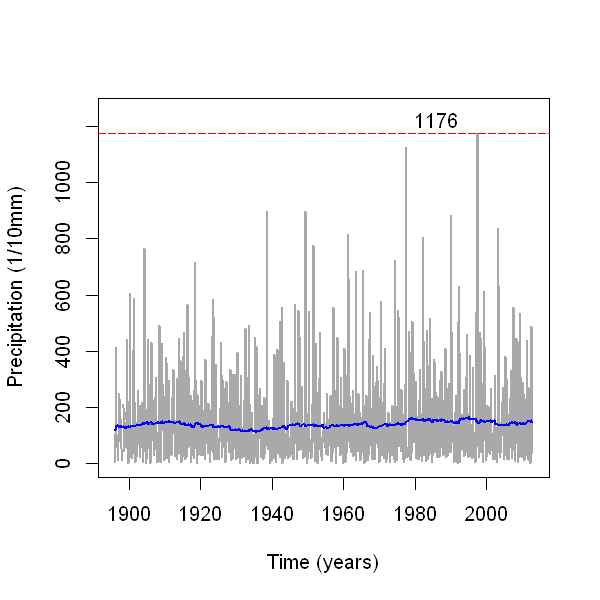

In [22]:
plot(maxTS2012, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,1250))
abline(h=maxObs, col="red", lwd=.5, lty=5)
points(smoothTS, col=4, type="l", lwd=2)
text(1986,maxObs+50,
           sprintf("%i",maxObs))

In the time series plot, we also see that the peaks are gradually increasing over time, which is of specific interest to people working with maximum rainfall estimation. These increasing peaks have been wreaking havoc on Texas and the Eastern US this year. (Template statement - change as needed for individual stations).

Produce smoothed plots to get a better understanding of the trends.

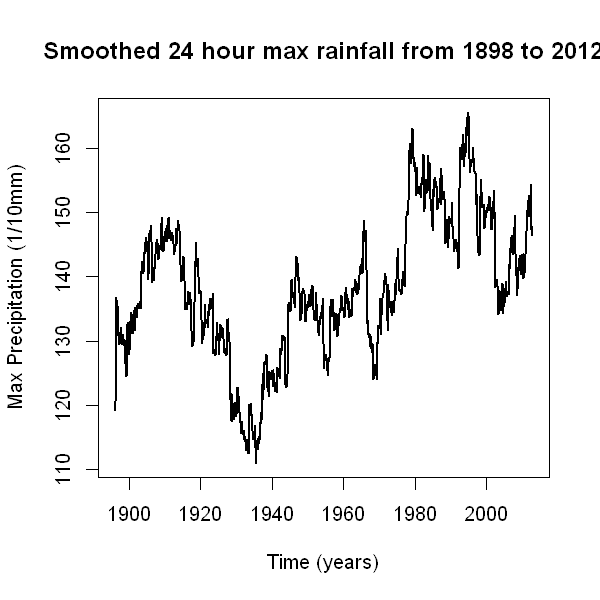

In [23]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2012")
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")

While the data shows a slight decrease in average rainfall at the tail end of our data (2014), the long term trend shows that average rainfall has been increasing. Empirically, we have had a wet year in 2016 that we would expect to match/exceed the long term observed increase in average maximum rainfall.(Template statement - change as needed for individual stations)

## Section 2: Parameter Estimation, Distribution, and Trends

In [173]:
mleGamma = data.frame(alpha = double(),
                 theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   gamma1 = fitdist(as.vector(testDist),"gamma",method = "mle")
   mleGamma[i,1] = gamma1$estimate[1]
   mleGamma[i,2] = gamma1$estimate[2]
   
   gof = gofstat(gamma1)
   mleGamma[i,3] = gof$ks
   mleGamma[i,4] = gof$kstest
   mleGamma[i,5] = gof$cvm
   mleGamma[i,6] = gof$cvmtest
   mleGamma[i,7] = gof$ad
   mleGamma[i,8] = gof$adtest
}

mleGamma["invTheta"] = 1/(mleGamma$theta)
mleGamma["mean"] = mleGamma$invTheta*mleGamma$alpha
mleGamma["var"] = mleGamma$alpha*(mleGamma$invTheta^2)
mleGamma["sd"] = sqrt(mleGamma$var)

In [39]:
mleGamma2 = data.frame(alpha = double(),
                 theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP2)) {

    testDist = na.omit(max_PRCP2[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   gamma1 = fitdist(as.vector(testDist),"gamma",method = "mge", gof="ADR")
   mleGamma2[i,1] = gamma1$estimate[1]
   mleGamma2[i,2] = gamma1$estimate[2]
   
   gof = gofstat(gamma1)
   mleGamma2[i,3] = gof$ks
   mleGamma2[i,4] = gof$kstest
   mleGamma2[i,5] = gof$cvm
   mleGamma2[i,6] = gof$cvmtest
   mleGamma2[i,7] = gof$ad
   mleGamma2[i,8] = gof$adtest
}

#mleGamma["invTheta"] = 1/(mleGamma$theta)
#mleGamma["mean"] = mleGamma$invTheta*mleGamma$alpha
#mleGamma["var"] = mleGamma$alpha*(mleGamma$invTheta^2)
#mleGamma["sd"] = sqrt(mleGamma$var)

In [41]:
table(mleGamma2[,4])


not rejected 
         110 

In [174]:
mleExp = data.frame(theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   exp1 = fitdist(as.vector(testDist),"exp",method = "mle")
   mleExp[i,1] = exp1$estimate[1]
   
   gof = gofstat(exp1)
   mleExp[i,2] = gof$ks
   mleExp[i,3] = gof$kstest
   mleExp[i,4] = gof$cvm
   mleExp[i,5] = gof$cvmtest
   mleExp[i,6] = gof$ad
   mleExp[i,7] = gof$adtest
}

mleExp["mean"] = 1/mleExp$theta
mleExp["square"] = mleExp$theta^2 
mleExp["var"] = 1/mleExp$square
mleExp["sd"] = sqrt(mleExp$var)

In [24]:
mleWB = data.frame(alpha = double(),theta = double(),
                 KS = double(),
                 KStest = character(),
                 CvM = double(),
                 CvMtest = character(),
                 AD = double(),
                 ADtest = character(),
                 stringsAsFactors = FALSE)
                
for (i in 1:length(max_PRCP)) {

    testDist = na.omit(max_PRCP[,i])
        
        for(j in 1:length(testDist)){
            if(testDist[j] < .1){
            testDist[j]=.0001
            }
        }

   WB1 = fitdist(as.vector(testDist),"weibull",method = "mle")
   mleWB[i,1] = WB1$estimate[1]
   mleWB[i,2] = WB1$estimate[2]
   
   gof = gofstat(WB1)
   mleWB[i,3] = gof$ks
   mleWB[i,4] = gof$kstest
   mleWB[i,5] = gof$cvm
   mleWB[i,6] = gof$cvmtest
   mleWB[i,7] = gof$ad
   mleWB[i,8] = gof$adtest
}


#mleWB["mean"] = 1/mleWB$theta
#mleWB["square"] = mleWB$theta^2 
#mleWB["var"] = 1/mleWB$square
#mleWB["sd"] = sqrt(mleWB$var)

In [25]:
head(mleWB)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest
0.9012763,126.7063,0.09708742,not rejected,0.2461638,rejected,1.916551,rejected
0.8934700,129.2136,0.08799946,not rejected,0.2507829,rejected,1.897670,rejected
0.8712358,127.9071,0.09128039,not rejected,0.2549693,rejected,1.822312,rejected
0.8612942,132.7855,0.08917338,not rejected,0.2459454,rejected,1.751709,rejected
0.9055221,139.7309,0.09486993,not rejected,0.1833747,rejected,1.108900,rejected
0.9162238,142.1785,0.08816377,not rejected,0.1860520,rejected,1.141164,rejected


In [26]:
table(mleWB$KStest)


not rejected     rejected 
          98           12 

In [175]:
which(mleGamma$KStest=="rejected")

[1] 30 31 32 33 34 35 36 37 38 39 52 53 54 55 56 57 61 62

In [176]:
which(mleExp$KStest=="rejected")

integer(0)

In [177]:
head(mleGamma)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest,invTheta,mean,var,sd
0.7702459,0.005838670,0.11823885,not rejected,0.3945848,NA,2.578290,NA,171.2719,131.9215,22594.44,150.3145
0.7592384,0.005623842,0.10957672,not rejected,0.3993983,NA,2.545615,NA,177.8144,135.0035,24005.57,154.9373
0.7329028,0.005426065,0.11023874,not rejected,0.3867091,NA,2.377635,NA,184.2956,135.0708,24892.95,157.7750
0.7228140,0.005126209,0.10648805,not rejected,0.3718661,NA,2.266249,NA,195.0759,141.0036,27506.41,165.8506
0.7894197,0.005429997,0.10174311,not rejected,0.2569872,NA,1.422317,NA,184.1622,145.3812,26773.72,163.6268
0.7953316,0.005407428,0.09718581,not rejected,0.2725329,NA,1.497542,NA,184.9308,147.0813,27199.86,164.9238


In [178]:
head(mleExp)

theta,KS,KStest,CvM,CvMtest,AD,ADtest,mean,square,var,sd
0.007582251,0.06135990,not rejected,0.07771479,not rejected,1.154525,not rejected,131.8870,5.749053e-05,17394.17,131.8870
0.007406461,0.05409077,not rejected,0.07202469,not rejected,1.120545,not rejected,135.0172,5.485567e-05,18229.66,135.0172
0.007404126,0.05999186,not rejected,0.06899385,not rejected,1.086094,not rejected,135.0598,5.482108e-05,18241.16,135.0598
0.007092198,0.05165822,not rejected,0.05439701,not rejected,1.053790,not rejected,141.0000,5.029928e-05,19881.00,141.0000
0.006879263,0.07186013,not rejected,0.08074364,not rejected,0.770200,not rejected,145.3644,4.732426e-05,21130.81,145.3644
0.006798410,0.06769829,not rejected,0.08938361,not rejected,0.817524,not rejected,147.0932,4.621838e-05,21636.42,147.0932


In [179]:
trueEst = NULL
for(i in 1:nrow(mleExp)){
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"plot")
    }
    if(mleExp$KStest[i] == "not rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"exp")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "not rejected"){
        trueEst = c(trueEst,"gamma")
    }
    if(mleExp$KStest[i] == "rejected" & mleGamma$KStest[i] == "rejected"){
        trueEst = c(trueEst,"fail")
    }
}

In [180]:
table(trueEst)

trueEst
 exp plot 
  18   92 

In [181]:
which(trueEst=="fail")

integer(0)

In [182]:
which(trueEst=="plot")

[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
[20]  20  21  22  23  24  25  26  27  28  29  40  41  42  43  44  45  46  47  48
[39]  49  50  51  58  59  60  63  64  65  66  67  68  69  70  71  72  73  74  75
[58]  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
[77]  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110

In [183]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

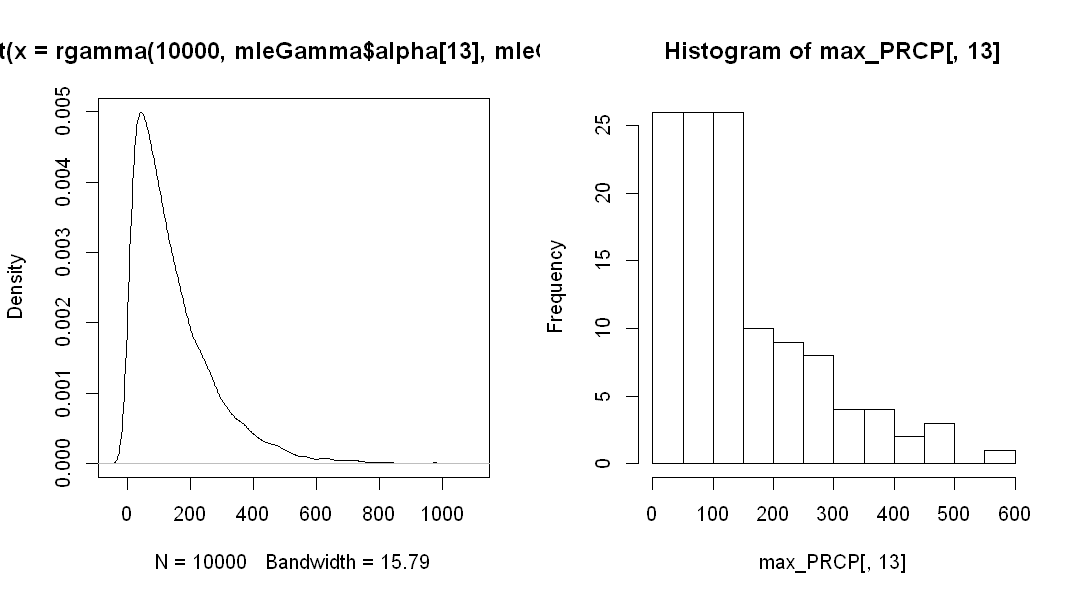

In [184]:
par(mfrow=c(1,2))
plot(density(rgamma(10000,mleGamma$alpha[13],mleGamma$theta[13])))
hist(max_PRCP[,13], breaks=20)

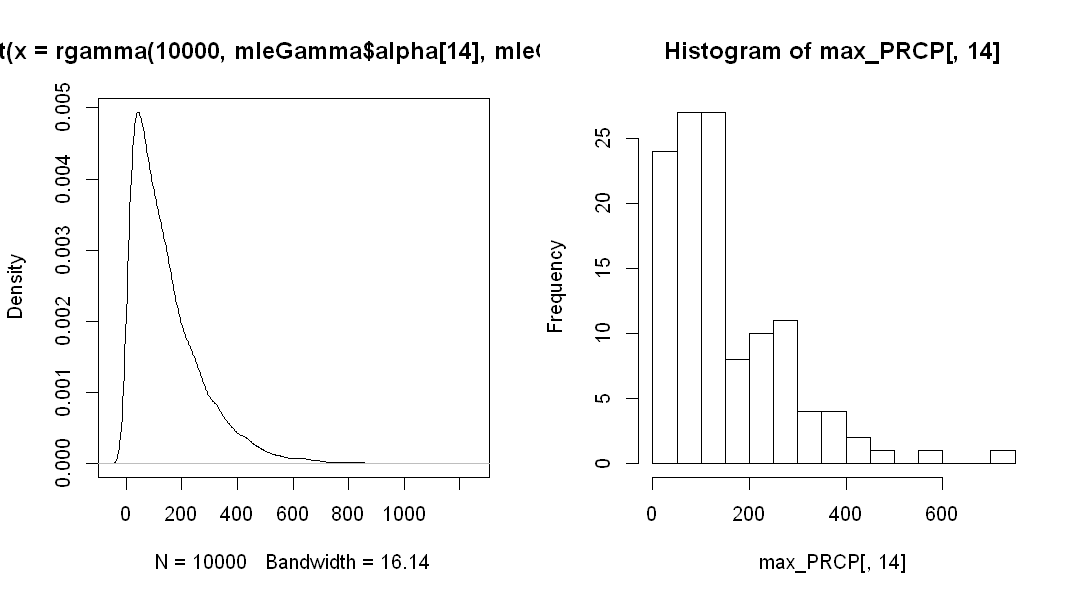

In [185]:
par(mfrow=c(1,2))
plot(density(rgamma(10000,mleGamma$alpha[14],mleGamma$theta[14])))
hist(max_PRCP[,14], breaks=20)

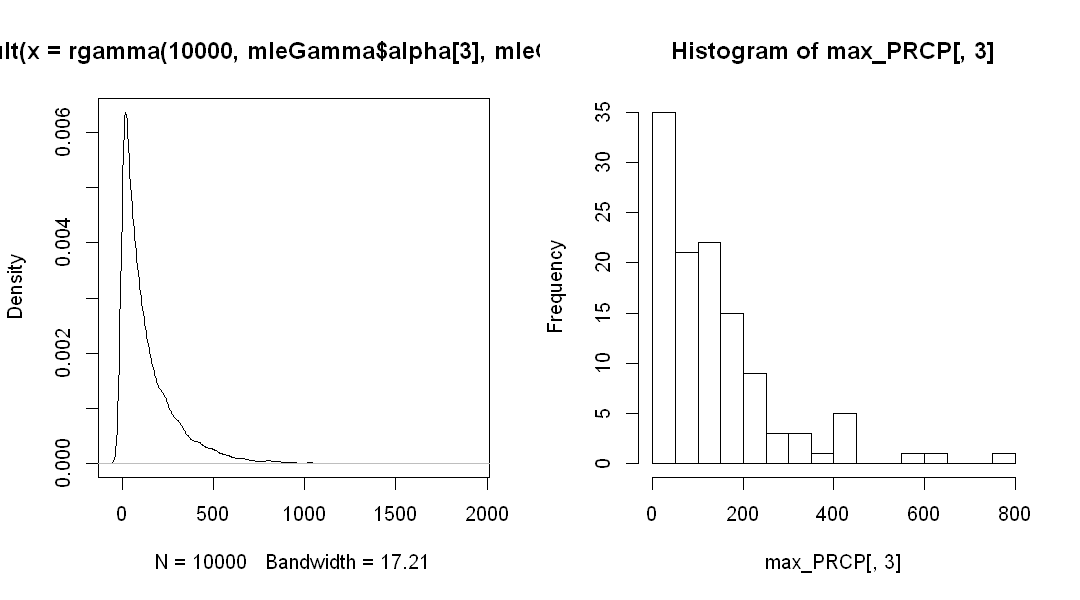

In [186]:
par(mfrow=c(1,2))
plot(density(rgamma(10000,mleGamma$alpha[3],mleGamma$theta[3])))
hist(max_PRCP[,3], breaks=20)

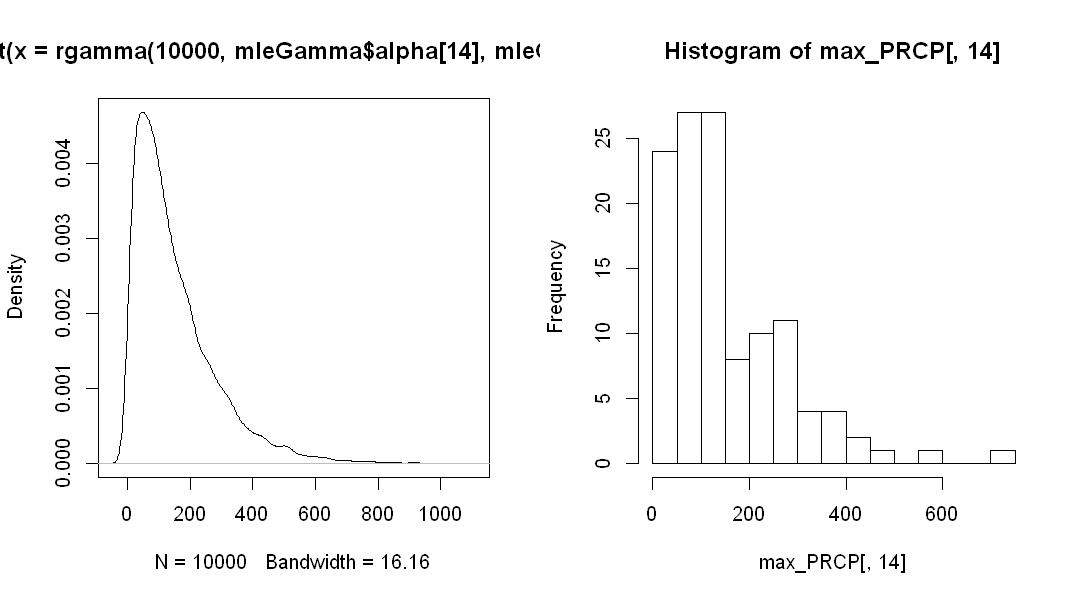

In [187]:
par(mfrow=c(1,2))
plot(density(rgamma(10000,mleGamma$alpha[14],mleGamma$theta[14])))
hist(max_PRCP[,14], breaks=20)

In [188]:
length(trueEst)

[1] 110

In [189]:
maxObs2 = max(na.omit(data$Max.PRCP.))

In [190]:
smooth2 = runmean(data$Max.PRCP., 120)

In [191]:
smoothTS2 = ts(smooth2, start=firstYear, freq=12)

setEPS()
postscript("pics/boulder2014Info.eps")
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,2500))
abline(h=maxObs2, col="red", lwd=.5, lty=5)
points(smoothTS2, col=4, type="l", lwd=2)
text(2013,maxObs2+100,sprintf("%i",maxObs2))
dev.off()

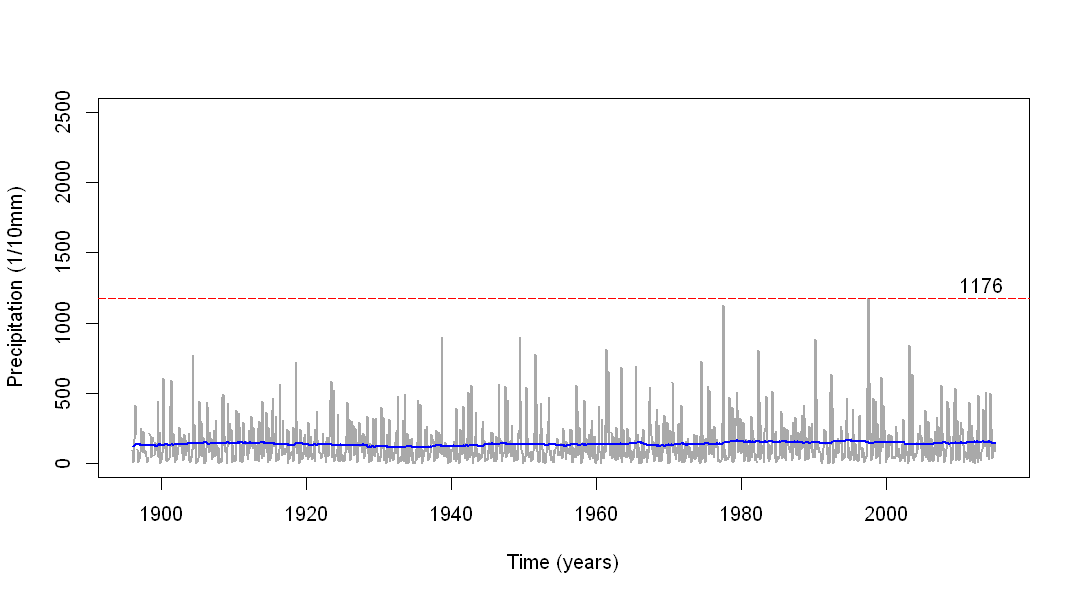

In [192]:
plot(maxTS, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Precipitation (1/10mm)", 
     #main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2012 by Monthly Max", stationName,firstYear),
     ylim=c(0,2500))
abline(h=maxObs2, col="red", lwd=.5, lty=5)
points(smoothTS2, col=4, type="l", lwd=2)
text(2013,maxObs2+100,sprintf("%i",maxObs2))

In [193]:
maxObs3 = maxObs

In [194]:
options(repr.plot.width=5, repr.plot.height=5) #reduces the plot sizes

In [195]:
maxTSNoEvent = ts(maxTSNoEvent, start=1898, freq=12)

setEPS()
postscript("pics/.eps")
dev.off()

setEPS()
postscript("pics/ts2012.eps")
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
dev.off()

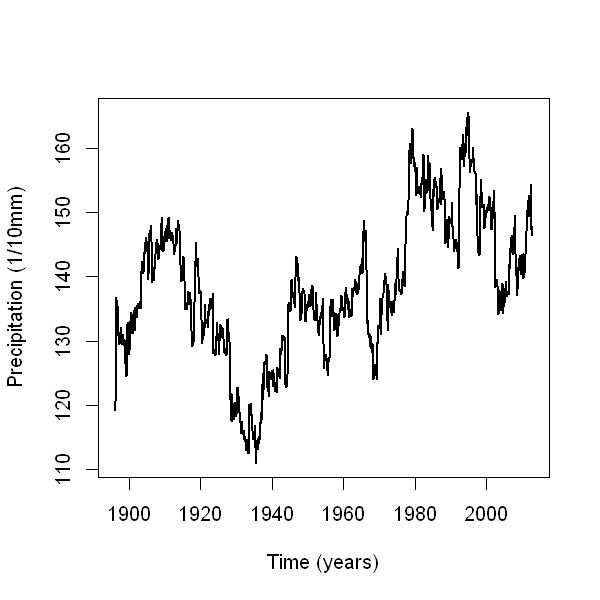

In [196]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )

setEPS()
postscript("pics/tsEvent.eps")
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4, ylim=c(130,220)
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
dev.off()

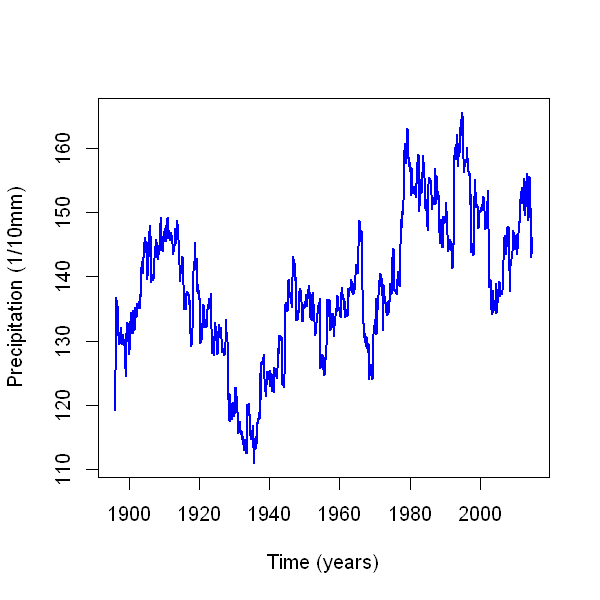

In [289]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )

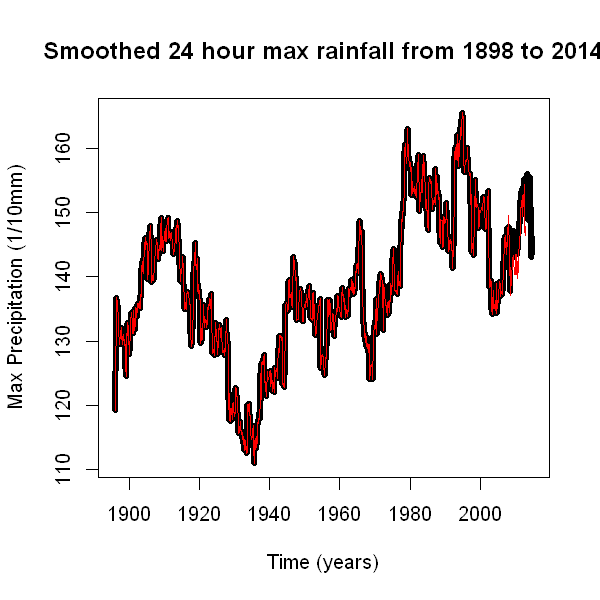

In [198]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=5,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2014")
lines(smoothTS, col=2)

In [199]:
means = apply(max_PRCP,2,mean)

In [200]:
sum(is.na(max_PRCP))

[1] 76

Can't use the apply function with all the NAs

In [201]:
means = NULL
for(i in 1:ncol(max_PRCP)){
    means = c(means,mean(na.omit(max_PRCP[,i])))
}

In [202]:
meanTS = ts(means,start=firstYear)

In [203]:
options(repr.plot.width=9, repr.plot.height=5) #reduces the plot sizes

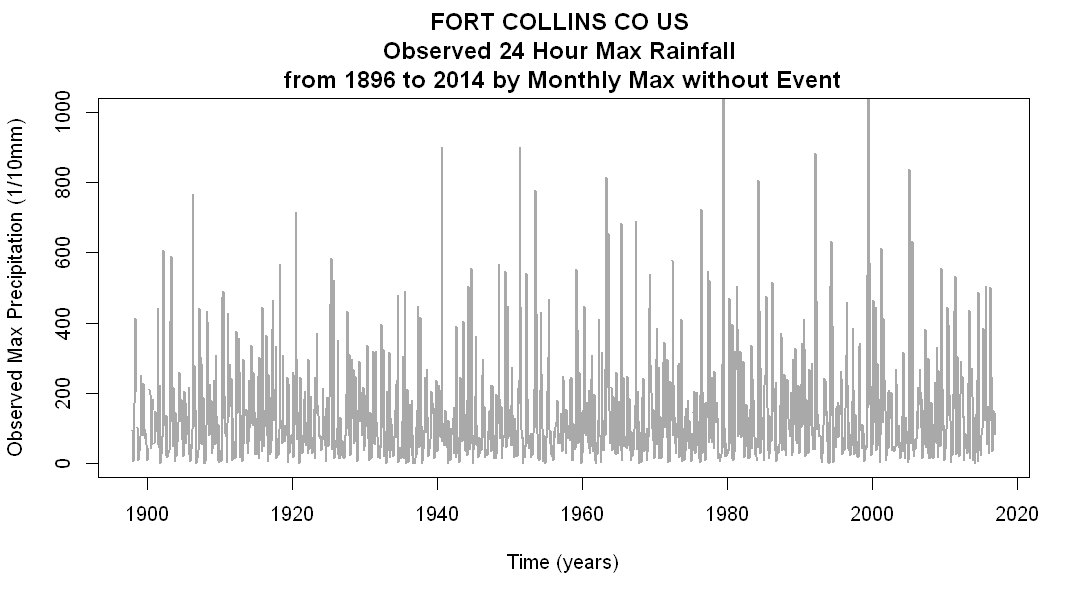

In [204]:
plot(maxTSNoEvent, xlab = "Time (years)", col = "darkgrey", lwd=1.75, ylab = "Observed Max Precipitation (1/10mm)", 
     main=sprintf("%s \nObserved 24 Hour Max Rainfall \nfrom %i to 2014 by Monthly Max without Event", 
     stationName,firstYear), ylim=c(0,1000), type="l")
abline(h=maxObs, col="red", lwd=.5, lty=5)
#points(smoothTS, col=4, type="l", lwd=2)
text(1985,maxObs3+50,sprintf("%i",maxObs3))

In [32]:
which(data$Max.PRCP.==maxObs2)

ERROR: Error in which(data$Max.PRCP. == maxObs2): object 'maxObs2' not found


In [33]:
data2= data

In [34]:
data2$Max.PRCP.[1389]=NA

In [35]:
smooth3 = runmean(data2$Max.PRCP., 120)

In [36]:
smoothTS3 = ts(smooth3, start = 1898, freq=12)

In [37]:
#create the first decade (first year and the following 9 years)
max_PRCP2 = data.frame(data2[which(data2$YEAR < (firstYear + 10)),6])

# add all the subsequent decades to the data frame incrementing by 1 year at a time
# i.e. 1898-1907, 1898-1908, etc
for(year in c((data2$YEAR[1] + 1):2005)){
    max_PRCP2 = cbind(max_PRCP2,data2[which(data2$YEAR >= year & data2$YEAR < year+10),6])
}

# name the columns as the first year of the observed 10 year periods
colnames(max_PRCP2) = as.character(c(firstYear:2005))

# set the missing values to NA
max_PRCP2[max_PRCP2==-999] = NA

In [211]:
means1 = NULL
for(i in 1:(length(max_PRCP)-2)){
    means1 = c(means1,mean(na.omit(max_PRCP[,i])))
}
means1TS = ts(means1, start = 1898)

In [212]:
vars1 = NULL
for(i in 1:(length(max_PRCP)-2)){
    vars1 = c(vars1,var(na.omit(max_PRCP2[,i])))
}
vars1TS = ts(vars1, start = 1898)

In [213]:
means3 = NULL
for(i in 1:(length(max_PRCP))){
    means3 = c(means3,mean(na.omit(max_PRCP[,i])))
}
means3TS = ts(means3, start = 1898)

In [214]:
means2 = NULL
for(i in 1:length(max_PRCP2)){
    means2 = c(means2,mean(na.omit(max_PRCP2[,i])))
}
means2TS = ts(means2, start = 1898)

In [215]:
options(repr.plot.width=5, repr.plot.height=5) #reduces the plot sizes

In [216]:
vars1TS

Time Series:
Start = 1898 
End = 2005 
Frequency = 1 
  [1] 17132.24 17677.51 17912.33 19677.28 19770.37 18721.59 16125.19 16460.47
  [9] 17512.64 14540.66 14689.79 15050.07 14845.88 15935.55 15455.63 14519.03
 [17] 14753.16 14319.76 18535.31 18501.20 17857.39 16471.50 16521.46 13537.75
 [25] 13761.54 14640.60 14634.97 15801.85 11707.51 11468.71 12026.85 11840.48
 [33] 11595.92 16297.79 15885.14 15293.37 15658.78 18373.73 17304.37 17652.75
 [41] 16094.08 17579.49 20111.56 15176.31 20985.87 21969.79 25372.25 22826.83
 [49] 23472.03 22848.96 22830.26 21355.61 21017.81 21669.77 16268.04 15745.51
 [57] 18597.63 17659.00 19113.17 19469.10 22040.06 22215.61 22316.76 22566.00
 [65] 22637.99 23726.30 17990.42 17754.49 15277.50 18127.67 18185.35 17935.23
 [73] 24621.77 25441.96 26969.18 25023.21 24271.05 29196.00 30871.52 29043.74
 [81] 27469.42 27315.29 18827.34 18181.66 16405.06 21490.26 21483.60 20336.29
 [89] 18230.95 18051.63 17934.97 18622.73 30068.36 30474.60 32557.70 27551.27
 [97] 2767

In [217]:
head(max_PRCP2)

1896,1897,1898,1899,1900,1901,1902,1903,1904,1905,...,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005
94,36,20,56,25,33,46,20,5,20,...,64,51,51,61,20,48,61,8,41,53
5,76,10,99,74,38,20,147,53,38,...,18,36,94,3,81,33,41,58,71,51
107,251,43,147,145,203,114,206,43,191,...,333,43,465,79,203,46,135,838,71,150
170,91,NA,114,607,404,64,173,97,442,...,91,536,155,612,43,267,33,269,147,140
244,NA,211,112,307,589,117,56,767,305,...,343,157,218,127,208,229,315,414,99,381
414,79,198,91,130,371,259,124,102,56,...,104,300,117,216,130,51,102,56,216,246


In [218]:
head(mleGamma)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest,invTheta,mean,var,sd
0.7702459,0.005838670,0.11823885,not rejected,0.3945848,NA,2.578290,NA,171.2719,131.9215,22594.44,150.3145
0.7592384,0.005623842,0.10957672,not rejected,0.3993983,NA,2.545615,NA,177.8144,135.0035,24005.57,154.9373
0.7329028,0.005426065,0.11023874,not rejected,0.3867091,NA,2.377635,NA,184.2956,135.0708,24892.95,157.7750
0.7228140,0.005126209,0.10648805,not rejected,0.3718661,NA,2.266249,NA,195.0759,141.0036,27506.41,165.8506
0.7894197,0.005429997,0.10174311,not rejected,0.2569872,NA,1.422317,NA,184.1622,145.3812,26773.72,163.6268
0.7953316,0.005407428,0.09718581,not rejected,0.2725329,NA,1.497542,NA,184.9308,147.0813,27199.86,164.9238


In [219]:
mleGam1 = ts(mleGamma$var, start=1898, freq=12)
mleGamSD = ts(mleGamma$sd, start=1898, freq=12)

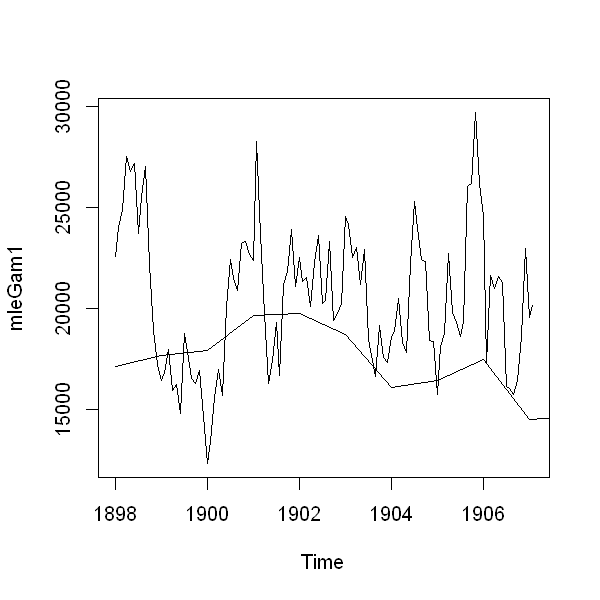

In [220]:
plot(mleGam1,type="l")
lines(vars1TS)

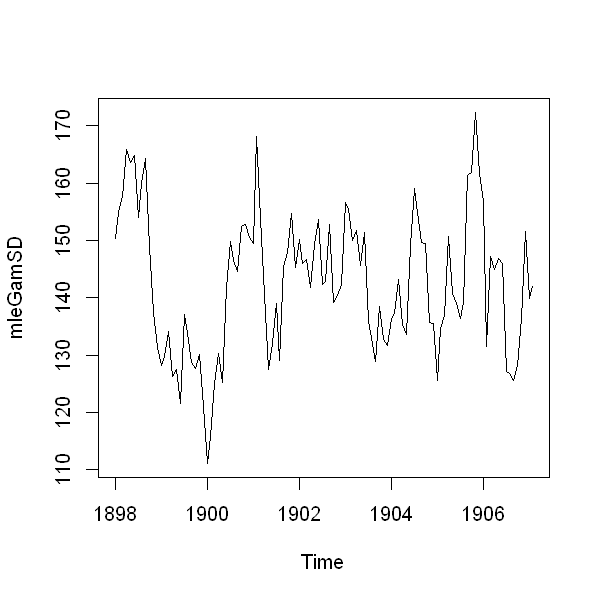

In [221]:
plot(mleGamSD,type="l")

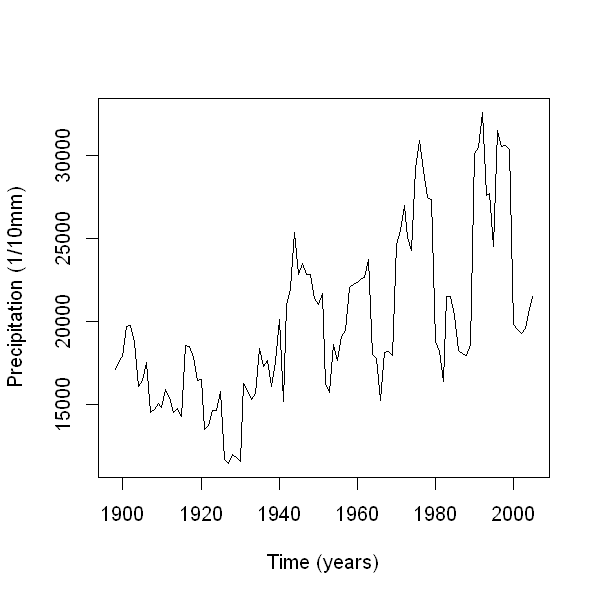

In [222]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(vars1TS, type="l", xlab = "Time (years)", lwd=1,
    ylab = "Precipitation (1/10mm)", col = 1)

setEPS()
postscript("pics/eventComp1.eps")
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
#lines(smoothTS3, col=2, lwd=2)
lines(smoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS prior to event"), lty = c(1,0,1),col=c(4,0,1),
      lwd=c(2,0,2), bty="n", cex = 1, pt.cex=1)
dev.off()

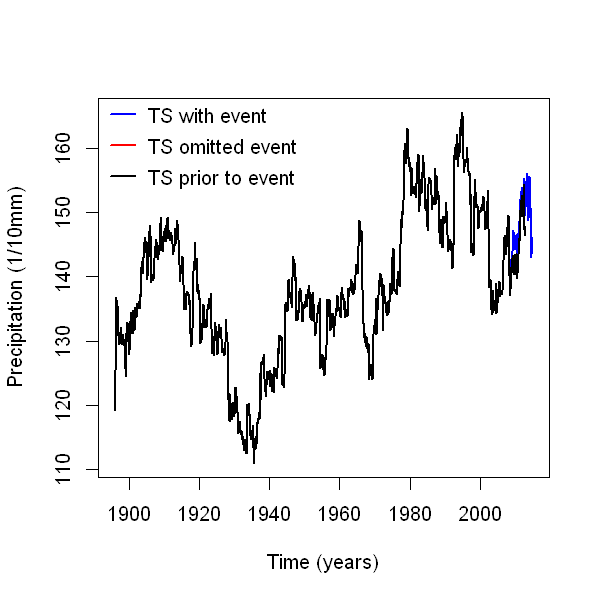

In [223]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
#lines(smoothTS3, col=2, lwd=2)
lines(smoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS omitted event","", "TS prior to event"), lty = c(1,0,1,0,1),col=c(4,0,2,0,1),
      lwd=c(2,0,2,0,2), bty="n", cex = 1, pt.cex=1)

In [224]:
length(smoothTS2)-1284

[1] 144

In [225]:
truncSmoothTS = ts(smoothTS[1284:1320], start=2004, freq=12)
truncSmoothTS2 = ts(smoothTS2[1284:length(smoothTS2)], start=2004, freq=12)
truncSmoothTS3 = ts(smoothTS3[1284:length(smoothTS3)], start=2004, freq=12)

setEPS()
postscript("pics/eventComp2.eps")
#rollSmall = runmean(data$Max.PRCP., 300)
plot(truncSmoothTS2, type="l", xlab = "Time (years)", lwd=4,
    ylab = "Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(truncSmoothTS3, col=2, lwd=3)
lines(truncSmoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS omitted event","", "TS prior to event"), lty = c(1,0,1,0,1),col=c(4,0,2,0,1),
      lwd=c(2,0,2,0,2), bty="n", cex = 1, pt.cex=1)
dev.off()

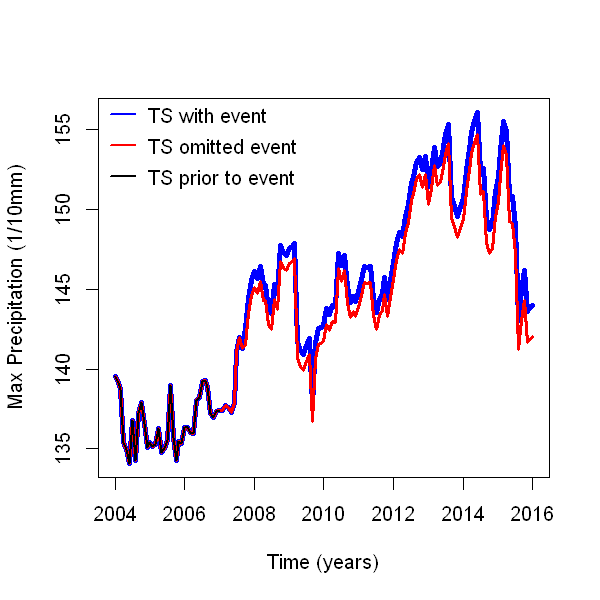

In [226]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(truncSmoothTS2, type="l", xlab = "Time (years)", lwd=4,
    ylab = "Max Precipitation (1/10mm)", col = 4, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2014"
    )
lines(truncSmoothTS3, col=2, lwd=3)
lines(truncSmoothTS, col=1, lwd=2)
legend("topleft",c("TS with event","", "TS omitted event","", "TS prior to event"), lty = c(1,0,1,0,1),col=c(4,0,2,0,1),
      lwd=c(2,0,2,0,2), bty="n", cex = 1, pt.cex=1)

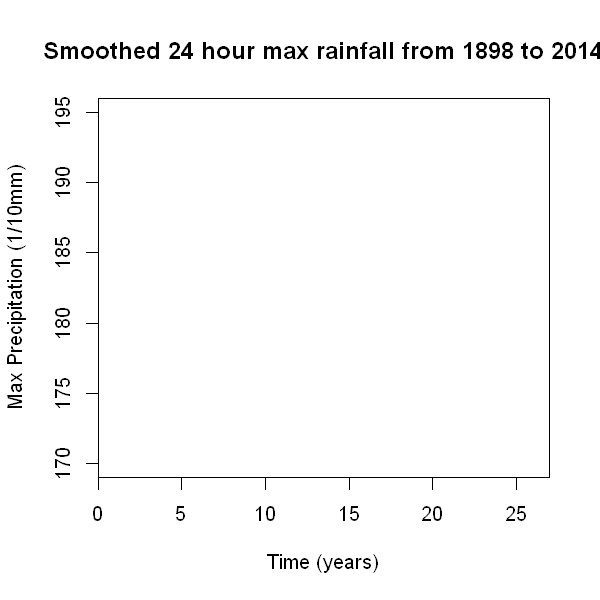

In [290]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(means2[85:length(means2)], type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 2, main="Smoothed 24 hour max rainfall from 1898 to 2014",   ylim=c(170,195))
lines(means3[85:length(means2)], col=4, lwd=2)
lines(means1[85:length(means2)], col=1, lwd=3)

In [291]:
smoothALL = runmean(data2$Max.PRCP., 1404/2)

In [229]:
smoothAllTS = ts(smoothALL, start=1898, freq = 12)

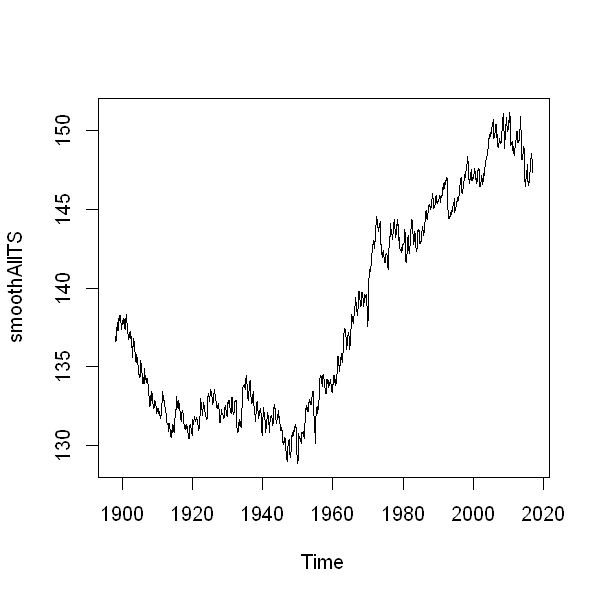

In [230]:
plot(smoothAllTS, type="l")

In [231]:
smoothALLEvent = runmean(data$Max.PRCP., 1404/2)

In [232]:
smoothAllEventTS = ts(smoothALLEvent, start = 1898, freq = 12)

setEPS()
postscript("pics/longTerm.eps")
plot(smoothAllEventTS, type="l", col="blue", ylab="Smoothed Precipitation (1/10mm)", xlab="Time (years)")
lines(smoothAllTS)
legend("topleft",c("Smoothing with Event","", "Smoothing without Event"), col = c(4,0,1),, lty=c(1,0,1), bty="n")
dev.off()

In [233]:
length(smoothAllTS)

[1] 1428

In [234]:
1404/2

[1] 702

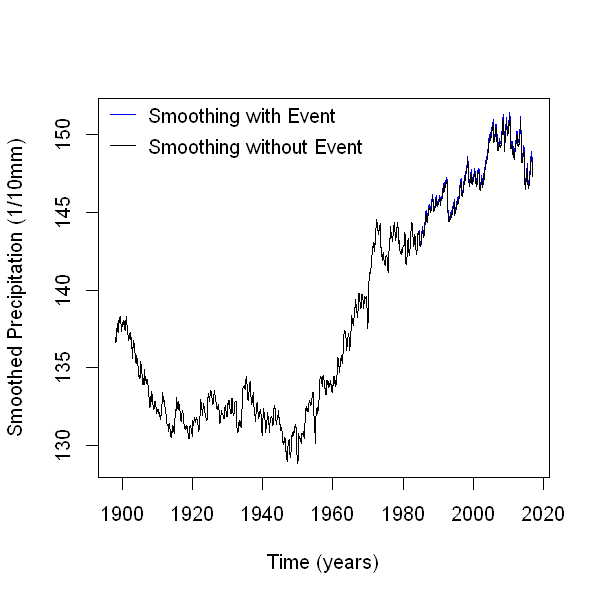

In [235]:
plot(smoothAllEventTS, type="l", col="blue", ylab="Smoothed Precipitation (1/10mm)", xlab="Time (years)")
lines(smoothAllTS)
legend("topleft",c("Smoothing with Event","", "Smoothing without Event"), col = c(4,0,1),, lty=c(1,0,1), bty="n")

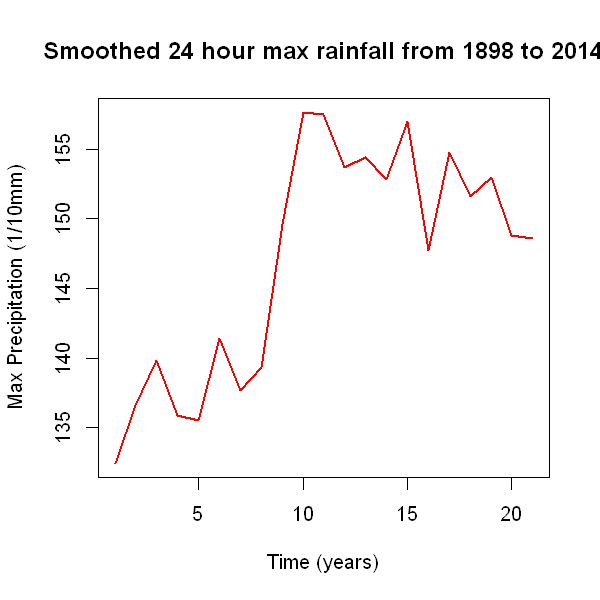

In [236]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(means1TS[70:90], type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 2, main="Smoothed 24 hour max rainfall from 1898 to 2014")

In [237]:
means1TS

Time Series:
Start = 1898 
End = 2005 
Frequency = 1 
  [1] 131.8870 135.0172 135.0598 141.0000 145.3644 147.0932 139.4153 145.1345
  [9] 147.9076 145.6891 148.6975 146.1681 144.4370 148.0417 140.5417 135.0917
 [17] 137.6083 129.6917 141.7583 137.7167 132.7417 133.2417 136.4583 128.1667
 [25] 130.7083 131.8500 128.1500 131.1833 118.9500 118.5167 118.8083 115.4083
 [33] 114.6167 119.9333 114.6833 114.1500 117.8750 126.3250 122.1417 124.5917
 [41] 122.6583 125.3667 130.1750 123.2583 135.9250 136.8250 142.6833 133.3500
 [49] 137.7583 135.6333 136.7167 133.5750 131.6833 135.3333 127.6583 127.4833
 [57] 134.2773 134.2521 134.2773 134.8487 137.2605 134.2773 138.3109 137.2521
 [65] 141.9748 146.5508 132.0504 129.5630 126.3814 132.4407 136.6017 139.8390
 [73] 135.8559 135.5424 141.4068 137.6723 139.3109 149.6017 157.6271 157.4576
 [81] 153.7034 154.4153 152.8475 156.9831 147.7542 154.7712 151.5678 152.9664
 [89] 148.7750 148.5583 144.0083 143.9250 158.2167 159.6833 165.3250 157.9583
 [97] 156.

In [238]:
means1TS[81]

[1] 153.7034

In [239]:
data1st = data[which(data$YEAR<=1981),]
data2nd = data[-which(data$YEAR<=1981),]

In [240]:
mean1sthalf = mean(na.omit(data1st$Max.PRCP.))
v1 = var(na.omit(data1st$Max.PRCP.))
mean2ndhalf = mean(na.omit(data2nd$Max.PRCP.))
v2 = var(na.omit(data2nd$Max.PRCP.))

In [241]:
unique(data1st$YEAR)

[1] 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910
[16] 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925
[31] 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940
[46] 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
[61] 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970
[76] 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981

In [242]:
anotherTS = smoothTS

In [243]:
require(changepoint)

In [244]:
cpTest = sort(smoothTS)

In [245]:
cpTest[652]

[1] 136.525

In [246]:
cpTest[645:680]

[1] 136.4286 136.4583 136.4667 136.4667 136.4750 136.4790 136.5079 136.5250
 [9] 136.5333 136.5833 136.5847 136.5882 136.5917 136.6017 136.6500 136.6750
[17] 136.7167 136.7750 136.7903 136.8000 136.8250 136.8333 136.9083 136.9244
[25] 136.9250 136.9412 136.9417 136.9583 136.9915 137.0085 137.0336 137.0424
[33] 137.0583 137.0625 137.0750 137.0924

In [247]:
cpt.mean(cpTest)

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              date version data.set cpttype method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Tue Sep 13 17:22:34 2016 

summary(.)  :
----------
Created Using changepoint version 2.2.1 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 21.74124 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 840 

In [248]:
cpt.mean(anotherTS)

Class 'cpt' : Changepoint Object
       ~~   : S4 class containing 12 slots with names
              date version data.set cpttype method test.stat pen.type pen.value minseglen cpts ncpts.max param.est 

Created on  : Tue Sep 13 17:22:34 2016 

summary(.)  :
----------
Created Using changepoint version 2.2.1 
Changepoint type      : Change in mean 
Method of analysis    : AMOC 
Test Statistic  : Normal 
Type of penalty       : MBIC with value, 21.74124 
Minimum Segment Length : 1 
Maximum no. of cpts   : 1 
Changepoint Locations : 976 

setEPS()
postscript("pics/qq1.eps")
qqnorm(smoothTS);qqline(smoothTS)
dev.off()

In [249]:
shapiro.test(smoothTS)


	Shapiro-Wilk normality test

data:  smoothTS
W = 0.99083, p-value = 1.096e-07


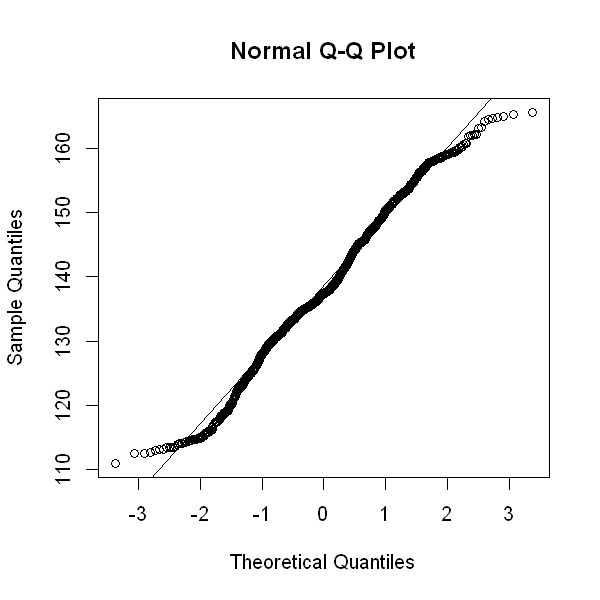

In [250]:
qqnorm(smoothTS);qqline(smoothTS)

setEPS()
postscript("pics/tri.eps")
hist(smoothTS,breaks=40,xlab="Precipitation (1/10mm)", main="")
dev.off()

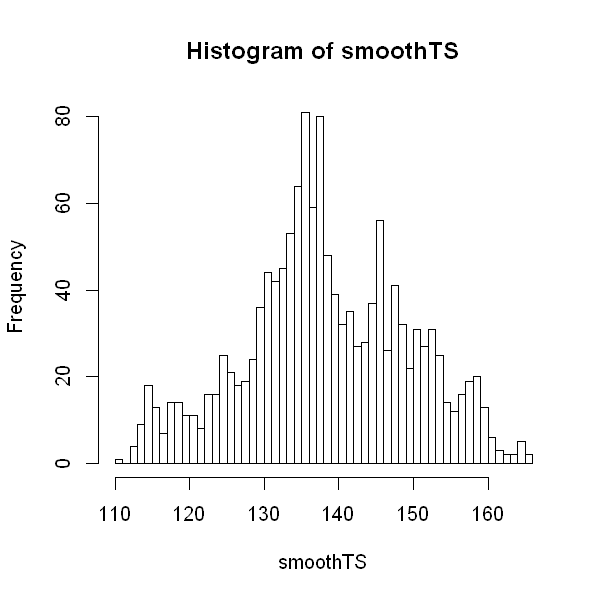

In [251]:
hist(smoothTS,breaks=40)

In [252]:
smoothTS[998:1010]

[1] 158.2966 159.0508 161.7881 163.0085 158.3390 158.6780 158.7288 157.5254
 [9] 158.0000 157.1780 157.4576 157.7203 157.3983

In [253]:
anotherTS[998:1002]

[1] 158.2966 159.0508 161.7881 163.0085 158.3390

In [254]:
996/12

[1] 83

In [255]:
1897+83

[1] 1980

In [256]:
length(smoothTS)/12

[1] 117

In [257]:
anotherTS[1:1007] = mean1sthalf
anotherTS[1008:length(smoothTS)] = mean2ndhalf

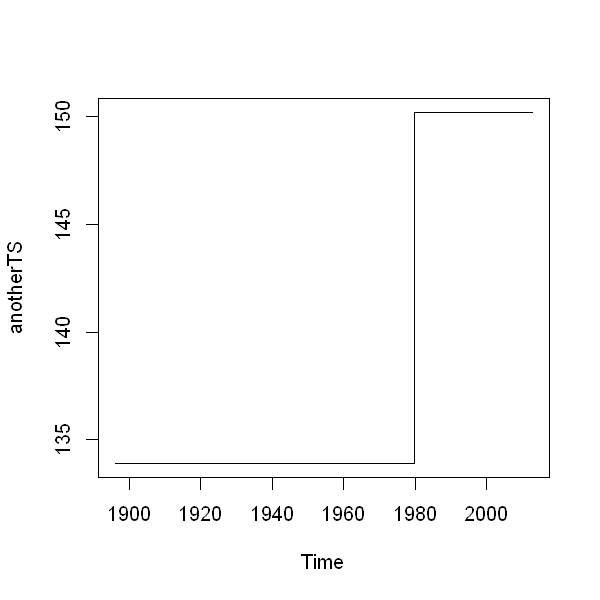

In [258]:
plot(anotherTS)

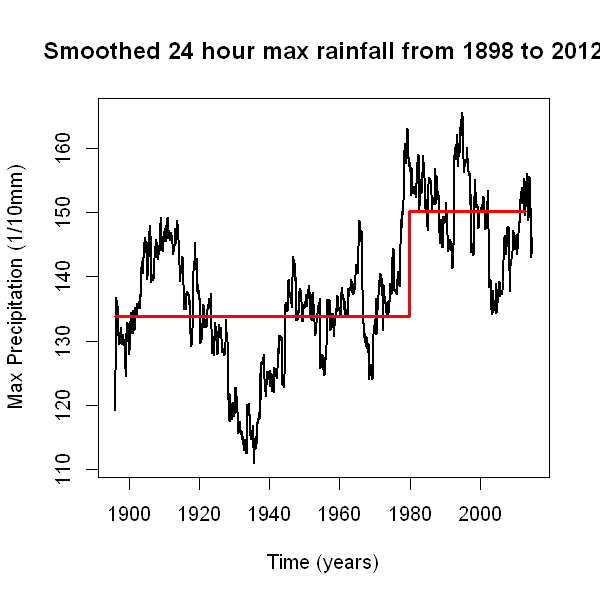

In [259]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS2, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, main="Smoothed 24 hour max rainfall from 1898 to 2012")
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS,col=2,lwd=3)

In [260]:
data1st2 = data2[which(data2$YEAR<=1981),]
data2nd2 = data2[-which(data2$YEAR<=1981),]

In [261]:
mean1sthalf2 = mean(na.omit(data1st2$Max.PRCP.))
mean2ndhalf2 = mean(na.omit(data2nd2$Max.PRCP.))

In [262]:
mean2ndhalf

[1] 150.2081

In [263]:
mean2ndhalf2

[1] 149.9237

In [264]:
anotherTS2 = anotherTS

In [265]:
anotherTS2[1:1007] = mean1sthalf2
anotherTS2[1008:length(smoothTS)] = mean2ndhalf2

In [266]:
mean1sthalf2

[1] 133.8905

In [267]:
mean2ndhalf2

[1] 149.9237

In [268]:
smoothTS[1048]

[1] 154.1949

setEPS()
postscript("pics/.eps")
dev.off()

setEPS()
postscript("pics/changeTS.eps")
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Precipitation (1/10mm)", col = 1, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2012"
    )
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS2,col=2,lwd=3)
    legend("topleft",c("Trend Line","","Means left and right of change point"), lty=c(1,0,1), lwd=c(2,0,2), col=c(1,0,2),
    bty="n", cex = .8, pt.cex=.8)
dev.off()

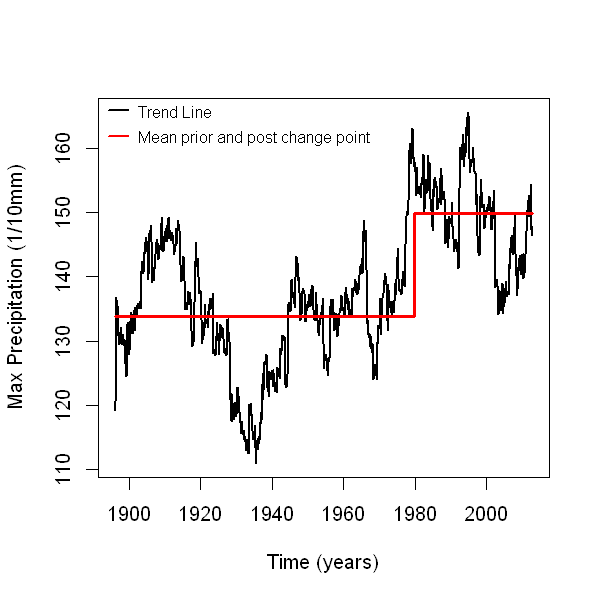

In [269]:
#rollSmall = runmean(data$Max.PRCP., 300)
plot(smoothTS, type="l", xlab = "Time (years)", lwd=2,
    ylab = "Max Precipitation (1/10mm)", col = 1, 
     #main="Smoothed 24 hour max rainfall from 1898 to 2012"
    )
    #points(rollLarge, type="l", col=4)
    #egend(0,200, c("300 window","", "900 window"), col=c(2,0,4), lty=c(1,0,1), bty="n")
    lines(anotherTS2,col=2,lwd=3)
    legend("topleft",c("Trend Line","","Mean prior and post change point"), lty=c(1,0,1), lwd=c(2,0,2), col=c(1,0,2),
    bty="n", cex = .8, pt.cex=.8)

In [270]:
length(smoothTS)

[1] 1404

In [271]:
length(smoothTS2)

[1] 1428

In [272]:
data["box"] = as.numeric(data$YEAR>=1981)

In [273]:
data2["box"] = as.numeric(data2$YEAR>=1981)

In [274]:
mean(na.omit(data2[which(data2$box == 0),"Max.PRCP."]))

[1] 133.8516

In [275]:
mean(na.omit(data2[which(data2$box == 1),"Max.PRCP."]))

[1] 149.5457

In [276]:
var(na.omit(data2[which(data2$box == 0),"Max.PRCP."]))

[1] 18336.71

In [277]:
var(na.omit(data2[which(data2$box == 1),"Max.PRCP."]))

[1] 22203.05

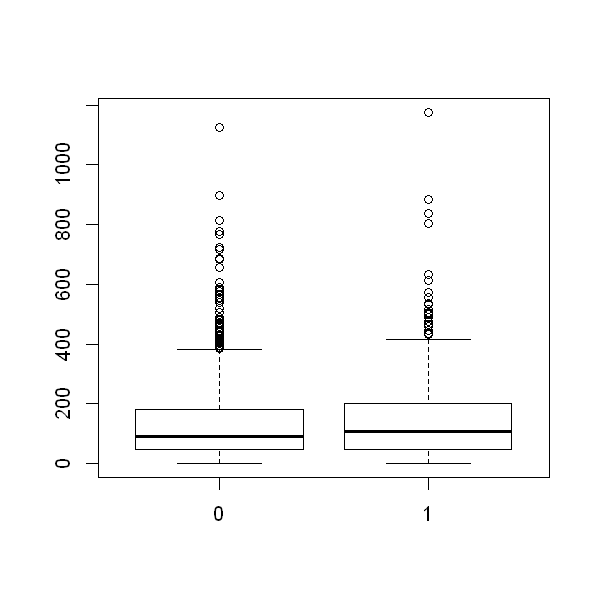

In [278]:
boxplot(data$Max.PRCP.~data$box)

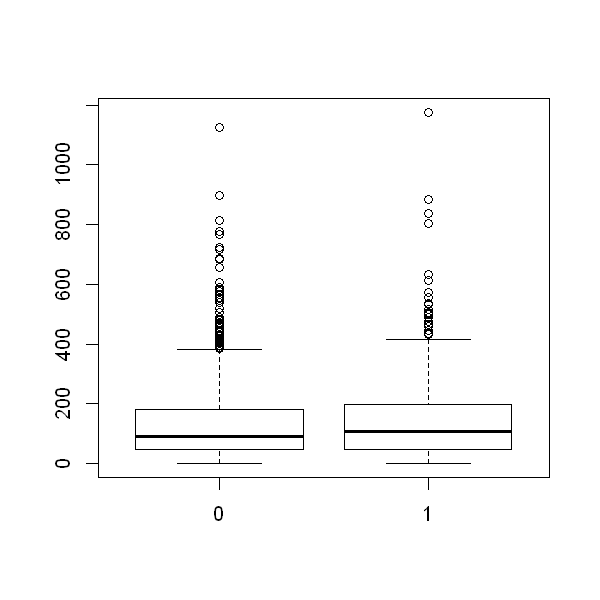

In [279]:
boxplot(data2$Max.PRCP.~data2$box)

In [298]:
indicator = c(rep(0,1007),rep(1,397))

In [299]:
length(indicator)

[1] 1404

In [300]:
length(smoothTS)

[1] 1404

In [301]:
1404/12

[1] 117

In [302]:
meansBox = as.data.frame(cbind(smoothTS,indicator))

In [307]:
meansBoxSea = as.data.frame(cbind(smoothTS, rep(c(1,2,3,4,5,6,7,8,9,10,11,12),115)))

ERROR: Error in .cbind.ts(list(...), .makeNamesTs(...), dframe = FALSE, union = TRUE): non-time series not of the correct length


In [308]:
names(meansBoxSea) = c("precipitation","month")

ERROR: Error in names(meansBoxSea) = c("precipitation", "month"): object 'meansBoxSea' not found


setEPS()
postscript("pics/box.eps")
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")
dev.off()

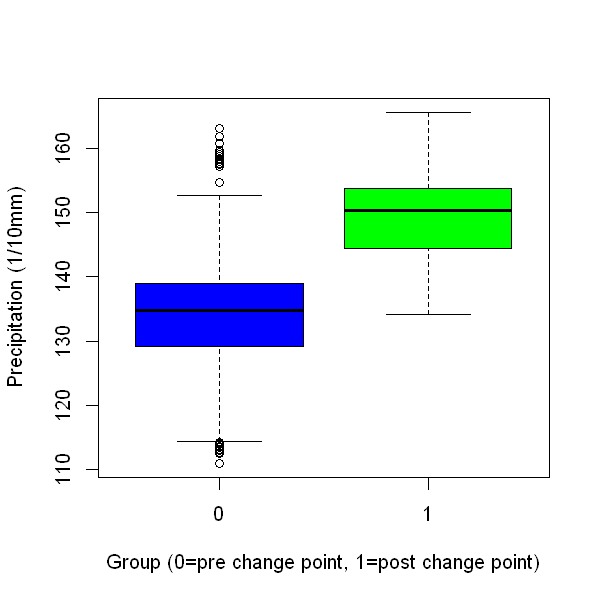

In [309]:
boxplot(meansBox$smoothTS ~ meansBox$indicator, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

In [310]:
boxplot(meansBoxSea$precipitation ~ meansBoxSea$month, xlab = "Group (0=pre change point, 1=post change point)",
       col = c("blue","green"), ylab = "Precipitation (1/10mm)")

ERROR: Error in eval(expr, envir, enclos): object 'meansBoxSea' not found


In [387]:
monthly = NULL
for(i in 1:12){
    monthly = cbind(monthly,data2[which(data2$MONTH==i),"Max.PRCP."])
}
monthlyDF = as.data.frame(monthly)
colnames(monthlyDF) = c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec")

In [388]:
require(ggplot2)

In [389]:
x = seq(1:nrow(data))

In [436]:
smoothJan = ts(monthlyDF$jan,start=1898)
smoothFeb = ts(monthlyDF$feb,start=1898)
smoothMar = ts(monthlyDF$mar,start=1898)
smoothApr = ts(monthlyDF$apr,start=1898)

smoothMay = ts(monthlyDF$may,start=1898)
smoothJune = ts(monthlyDF$june,start=1898)
smoothJuly = ts(monthlyDF$july,start=1898)
smoothAug = ts(monthlyDF$aug,start=1898)

smoothSept = ts(monthlyDF$sept,start=1898)
smoothOct = ts(monthlyDF$oct,start=1898)
smoothNov = ts(monthlyDF$nov,start=1898)
smoothDec = ts(monthlyDF$dec,start=1898)

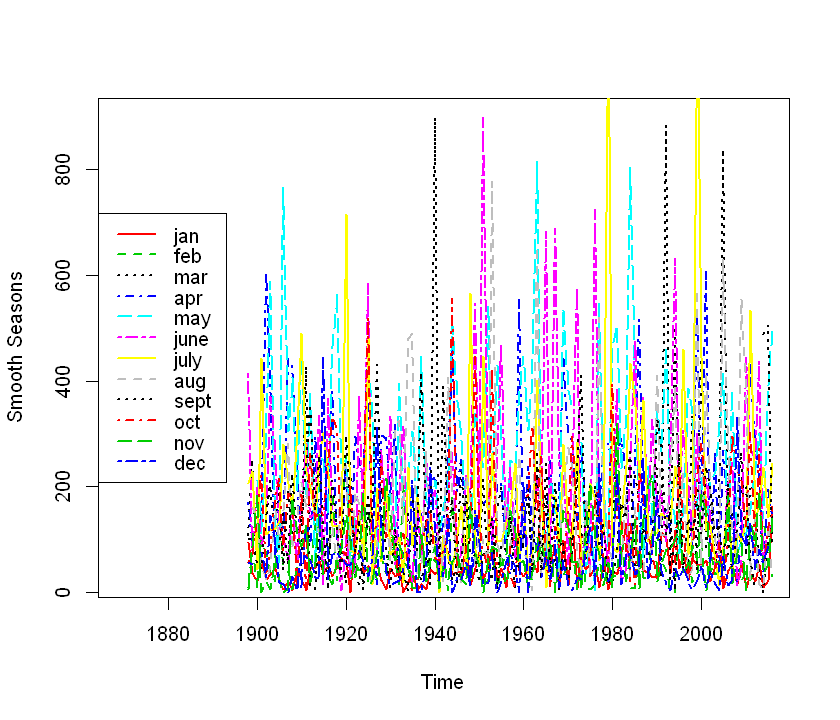

In [437]:
plot(smoothJan,col=2,ylim=c(25,900),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=2)
lines(smoothMar, lwd=2, lty=3)
lines(smoothApr,col=4, lwd=2, lty=4)

lines(smoothMay,col=5, lwd=2, lty=5)
lines(smoothJune,col=6, lwd=2, lty=6)
lines(smoothJuly,col=7, lwd=2, lty=7)
lines(smoothAug,col=8, lwd=2, lty=8)

lines(smoothSept,col=9, lwd=2, lty=9)
lines(smoothOct,col=10, lwd=2, lty=10)
lines(smoothNov,col=11, lwd=2, lty=11)
lines(smoothDec,col=12, lwd=2, lty=12)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,2,3,4,5,6,7,8,9,10,11,12),inset=c(0,0),
      lwd=c(rep(2,12)))

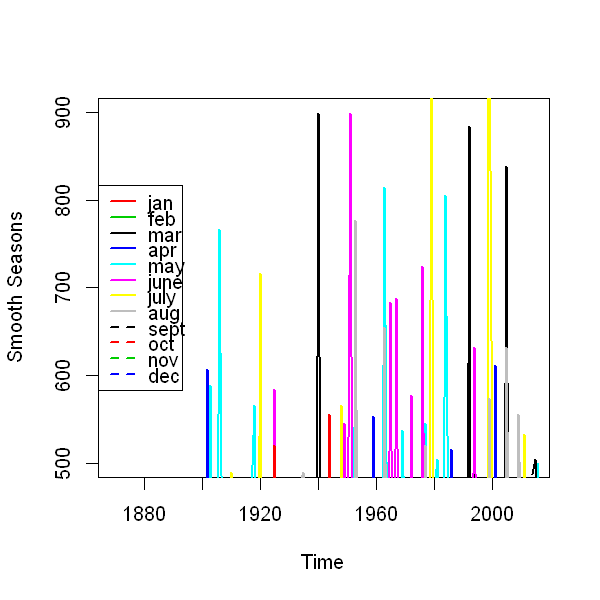

In [392]:
plot(smoothJan,col=2,ylim=c(500,900),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=1)
lines(smoothMar, lwd=2, lty=1)
lines(smoothApr,col=4, lwd=2, lty=1)

lines(smoothMay,col=5, lwd=2, lty=1)
lines(smoothJune,col=6, lwd=2, lty=1)
lines(smoothJuly,col=7, lwd=2, lty=1)
lines(smoothAug,col=8, lwd=2, lty=1)

lines(smoothSept,col=9, lwd=2, lty=1)
lines(smoothOct,col=10, lwd=2, lty=1)
lines(smoothNov,col=11, lwd=2, lty=1)
lines(smoothDec,col=12, lwd=2, lty=1)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=(c(rep(1,8),2,2,2,2)),inset=c(0,0),
      lwd=c(rep(2,12)))

In [434]:
smoothJan = ts(runmean(monthlyDF$jan,10),start=1898)
smoothFeb = ts(runmean(monthlyDF$feb,10),start=1898)
smoothMar = ts(runmean(monthlyDF$mar,10),start=1898)
smoothApr = ts(runmean(monthlyDF$apr,10),start=1898)

smoothMay = ts(runmean(monthlyDF$may,10),start=1898)
smoothJune = ts(runmean(monthlyDF$june,10),start=1898)
smoothJuly = ts(runmean(monthlyDF$july,10),start=1898)
smoothAug = ts(runmean(monthlyDF$aug,10),start=1898)

smoothSept = ts(runmean(monthlyDF$sept,10),start=1898)
smoothOct = ts(runmean(monthlyDF$oct,10),start=1898)
smoothNov = ts(runmean(monthlyDF$nov,10),start=1898)
smoothDec = ts(runmean(monthlyDF$dec,10),start=1898)

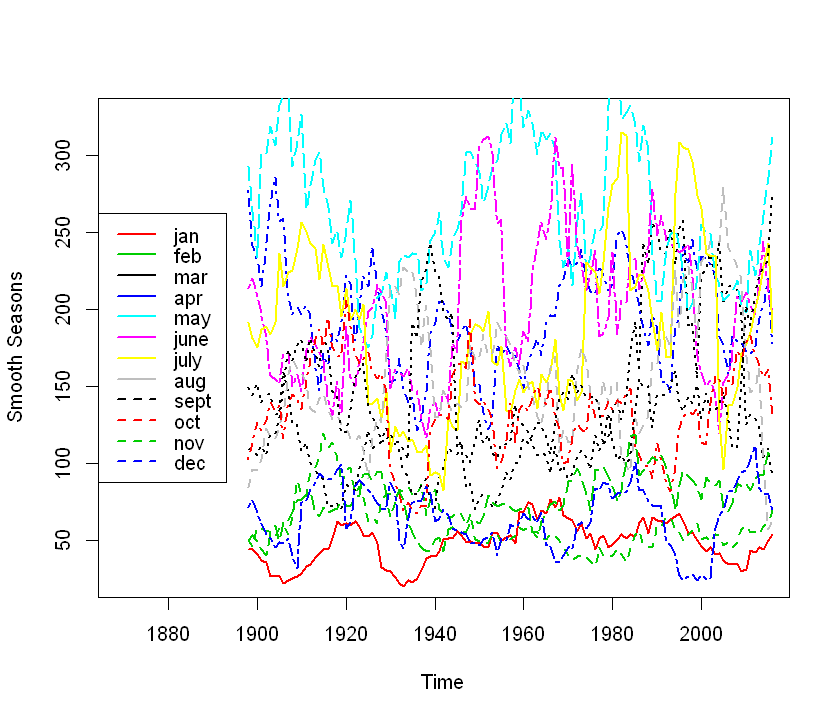

In [435]:
plot(smoothJan,col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=2)
lines(smoothMar, lwd=2, lty=3)
lines(smoothApr,col=4, lwd=2, lty=4)

lines(smoothMay,col=5, lwd=2, lty=5)
lines(smoothJune,col=6, lwd=2, lty=6)
lines(smoothJuly,col=7, lwd=2, lty=7)
lines(smoothAug,col=8, lwd=2, lty=8)

lines(smoothSept,col=9, lwd=2, lty=9)
lines(smoothOct,col=10, lwd=2, lty=10)
lines(smoothNov,col=11, lwd=2, lty=11)
lines(smoothDec,col=12, lwd=2, lty=12)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)))

In [438]:
smoothJan = ts(runmean(monthlyDF$jan,40),start=1898)
smoothFeb = ts(runmean(monthlyDF$feb,40),start=1898)
smoothMar = ts(runmean(monthlyDF$mar,40),start=1898)
smoothApr = ts(runmean(monthlyDF$apr,40),start=1898)

smoothMay = ts(runmean(monthlyDF$may,40),start=1898)
smoothJune = ts(runmean(monthlyDF$june,40),start=1898)
smoothJuly = ts(runmean(monthlyDF$july,40),start=1898)
smoothAug = ts(runmean(monthlyDF$aug,40),start=1898)

smoothSept = ts(runmean(monthlyDF$sept,40),start=1898)
smoothOct = ts(runmean(monthlyDF$oct,40),start=1898)
smoothNov = ts(runmean(monthlyDF$nov,40),start=1898)
smoothDec = ts(runmean(monthlyDF$dec,40),start=1898)

In [439]:
options(repr.plot.width=7, repr.plot.height=6) #reduces the plot sizes

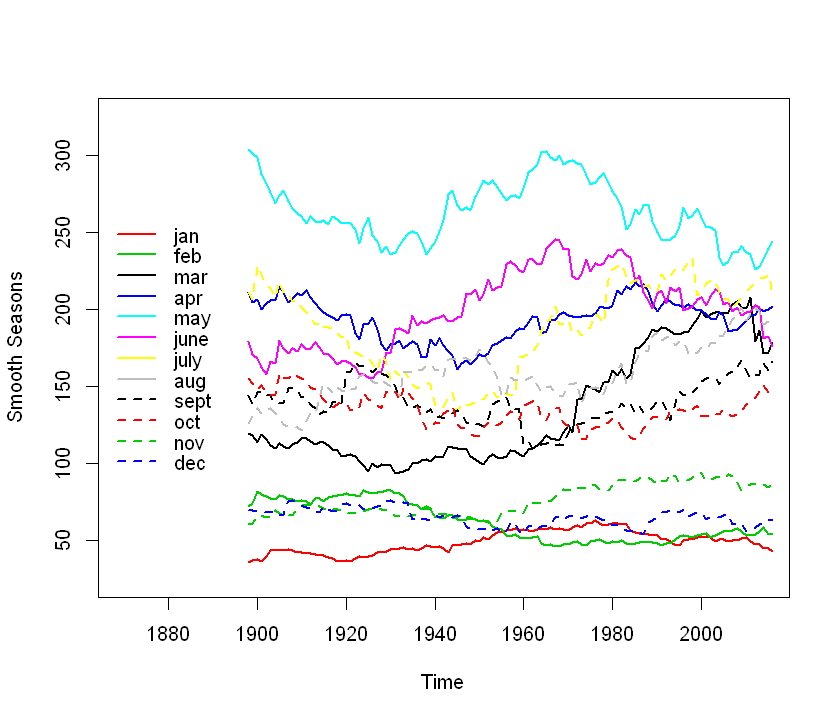

In [441]:
plot(smoothJan,col=2,ylim=c(25,325),ylab="Smooth Seasons", lwd=2, lty=1,xlim=c(1870,2014))
lines(smoothFeb,col=3, lwd=2, lty=1)
lines(smoothMar, lwd=2, lty=1)
lines(smoothApr,col=4, lwd=2, lty=1)

lines(smoothMay,col=5, lwd=2, lty=1)
lines(smoothJune,col=6, lwd=2, lty=1)
lines(smoothJuly,col=7, lwd=2, lty=2)
lines(smoothAug,col=8, lwd=2, lty=2)

lines(smoothSept,col=9, lwd=2, lty=2)
lines(smoothOct,col=10, lwd=2, lty=2)
lines(smoothNov,col=11, lwd=2, lty=2)
lines(smoothDec,col=12, lwd=2, lty=2)

legend("left",c("jan", "feb","mar","apr","may","june","july","aug","sept","oct","nov","dec"), 
       col=c(2,3,1,4,5,6,7,8,9,10,11,12), lty=c(1,1,1,1,1,1,1,1,2,2,2,2),inset=c(0,0),
      lwd=c(rep(2,12)), bty="n")

Warning message:
: Removed 12 rows containing missing values (geom_point).

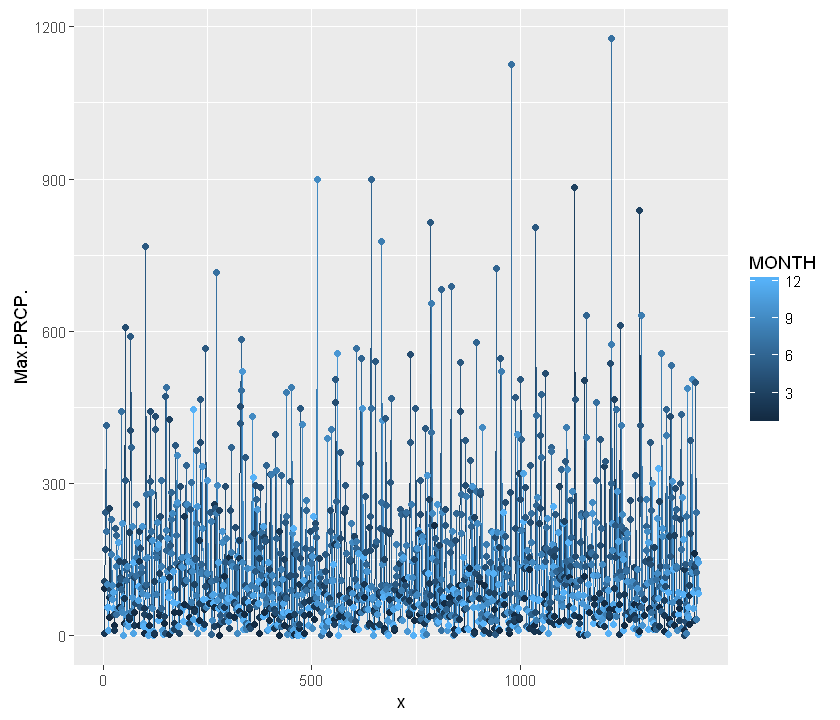

In [398]:
ggplot(data2, aes(x, Max.PRCP.,colour=MONTH)) + 
    geom_line() + 
    geom_point()

In [399]:
options(repr.plot.width=6, repr.plot.height=4) #reduces the plot sizes

In [400]:
smoothJan = ts(monthlyDF$jan,start=1898)
smoothFeb = ts(monthlyDF$feb,start=1898)
smoothMar = ts(monthlyDF$mar,start=1898)
smoothApr = ts(monthlyDF$apr,start=1898)

smoothMay = ts(monthlyDF$may,start=1898)
smoothJune = ts(monthlyDF$june,start=1898)
smoothJuly = ts(monthlyDF$july,start=1898)
smoothAug = ts(monthlyDF$aug,start=1898)

smoothSept = ts(monthlyDF$sept,start=1898)
smoothOct = ts(monthlyDF$oct,start=1898)
smoothNov = ts(monthlyDF$nov,start=1898)
smoothDec = ts(monthlyDF$dec,start=1898)

In [401]:
smoothJan = ts(monthlyDF$jan,start=1898)
smoothFeb = ts(monthlyDF$feb,start=1898)
smoothMar = ts(monthlyDF$mar,start=1898)
smoothApr = ts(monthlyDF$apr,start=1898)

smoothMay = ts(monthlyDF$may,start=1898)
smoothJune = ts(monthlyDF$june,start=1898)
smoothJuly = ts(monthlyDF$july,start=1898)
smoothAug = ts(monthlyDF$aug,start=1898)

smoothSept = ts(monthlyDF$sept,start=1898)
smoothOct = ts(monthlyDF$oct,start=1898)
smoothNov = ts(monthlyDF$nov,start=1898)
smoothDec = ts(monthlyDF$dec,start=1898)

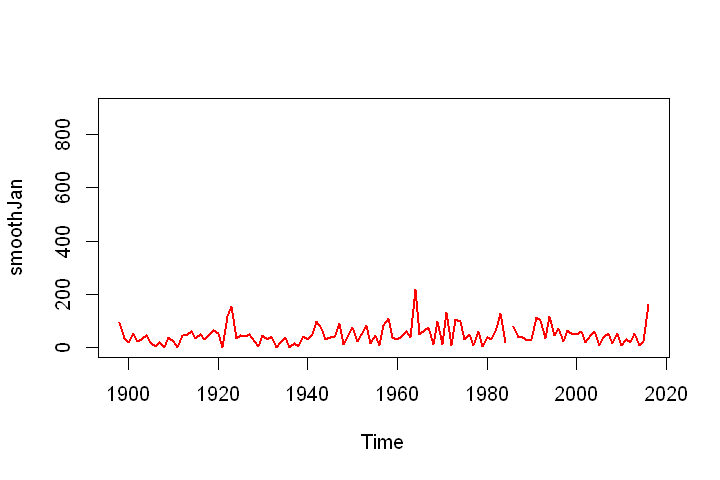

In [402]:
plot(smoothJan, ylim=c(0,900), lwd=2, lty=1, col=2)

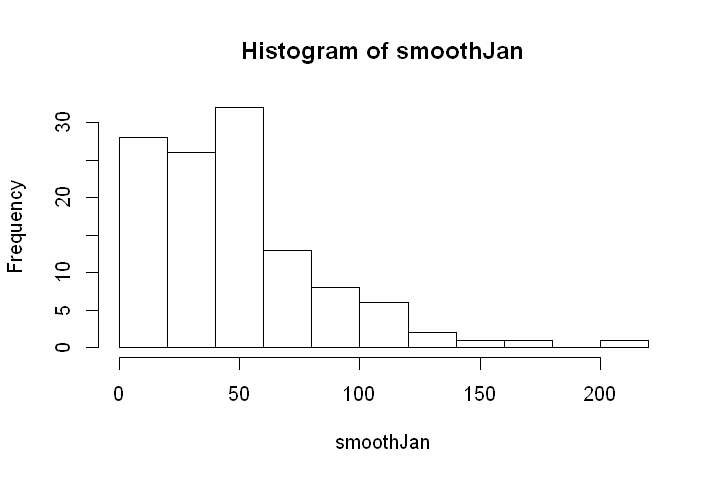

In [403]:
hist(smoothJan,breaks=10)

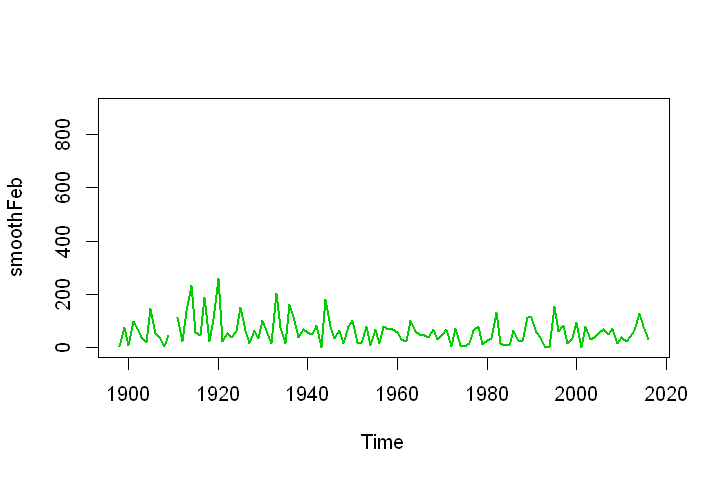

In [404]:
plot(smoothFeb, ylim=c(0,900), lwd=2, lty=1, col=3)

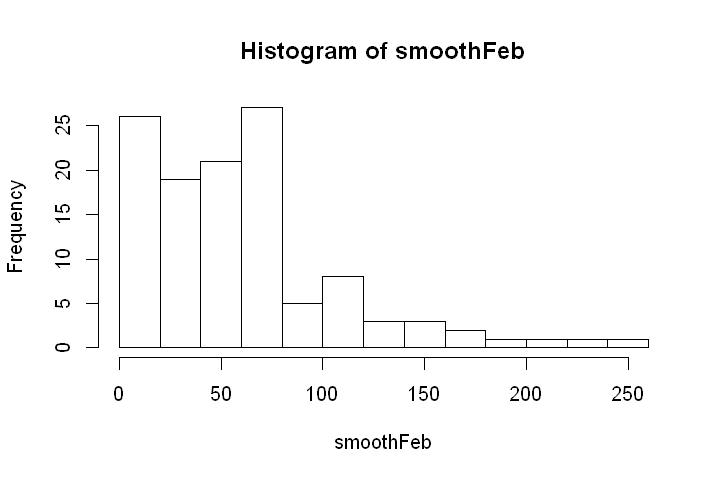

In [405]:
hist(smoothFeb,breaks=10)

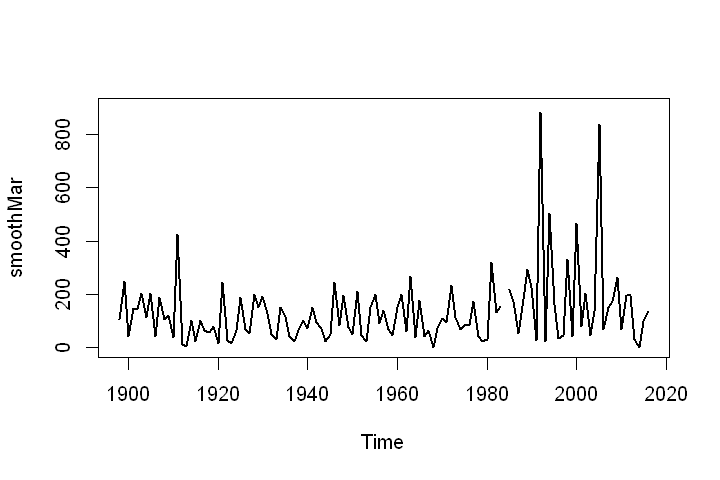

In [406]:
plot(smoothMar, ylim=c(0,900), lwd=2, lty=1, col=1)

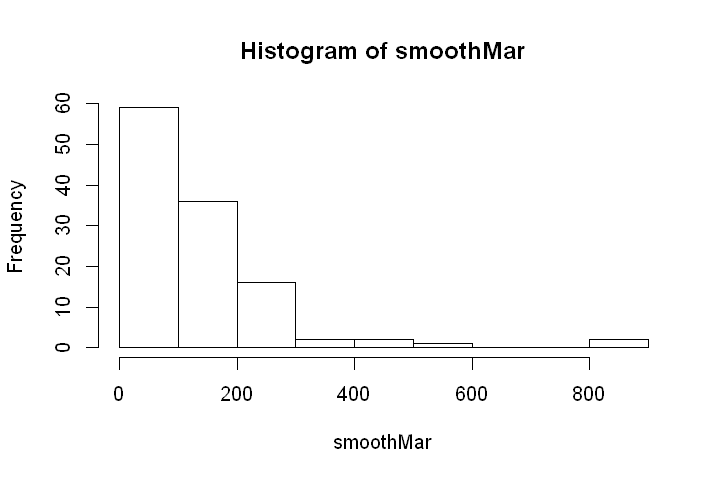

In [407]:
hist(smoothMar,breaks=10)

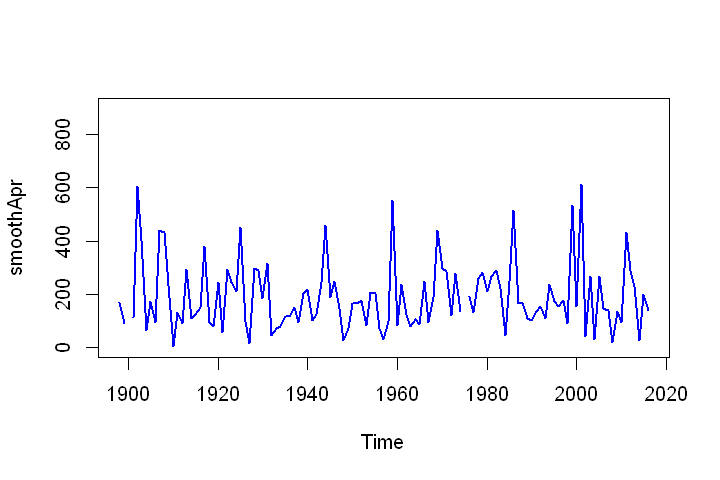

In [408]:
plot(smoothApr, ylim=c(0,900), lwd=2, lty=1, col=4)

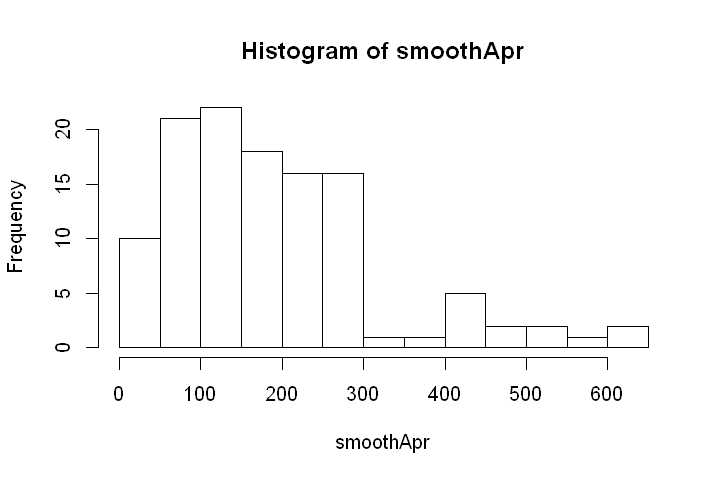

In [409]:
hist(smoothApr,breaks=10)

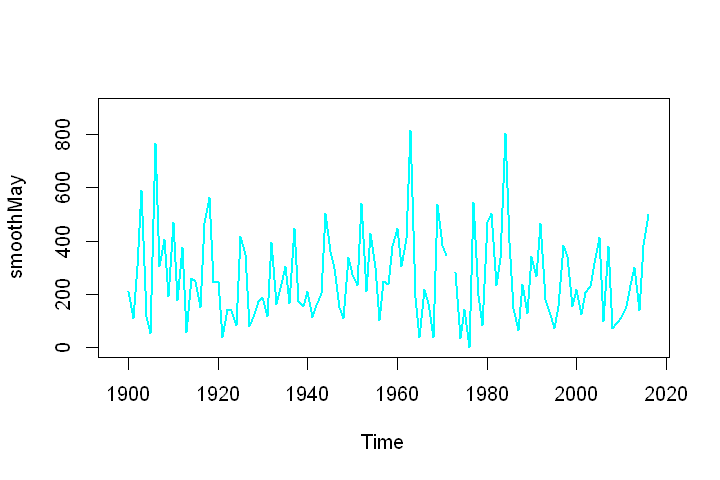

In [410]:
plot(smoothMay, ylim=c(0,900), lwd=2, lty=1, col=5)

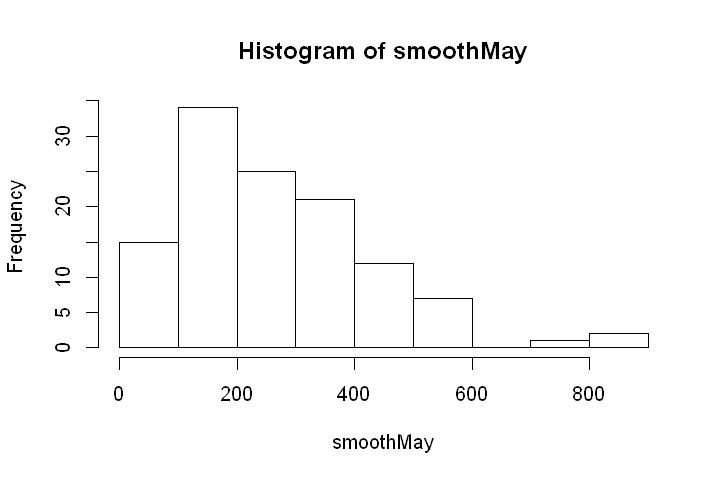

In [411]:
hist(smoothMay,breaks=10)

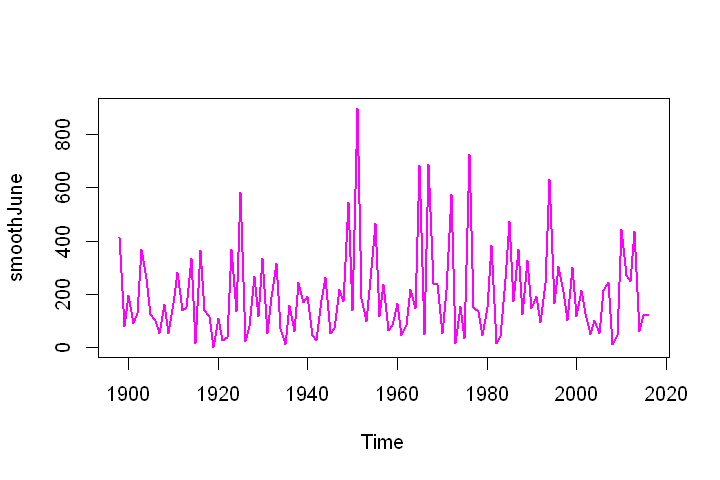

In [412]:
plot(smoothJune, ylim=c(0,900), lwd=2, lty=1, col=6)

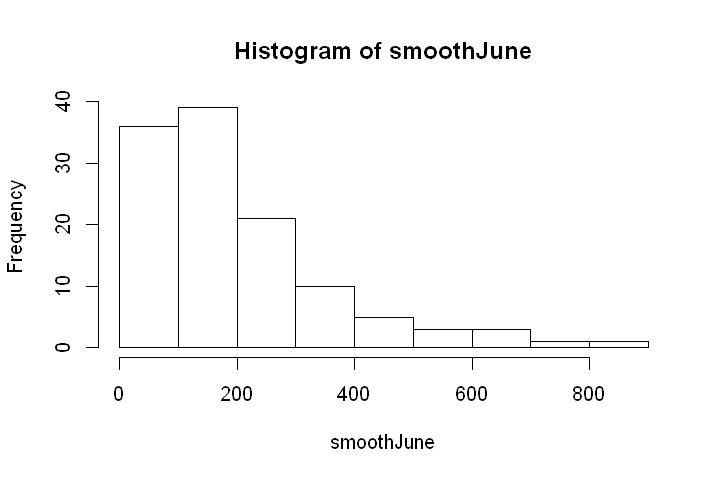

In [413]:
hist(smoothJune,breaks=10)

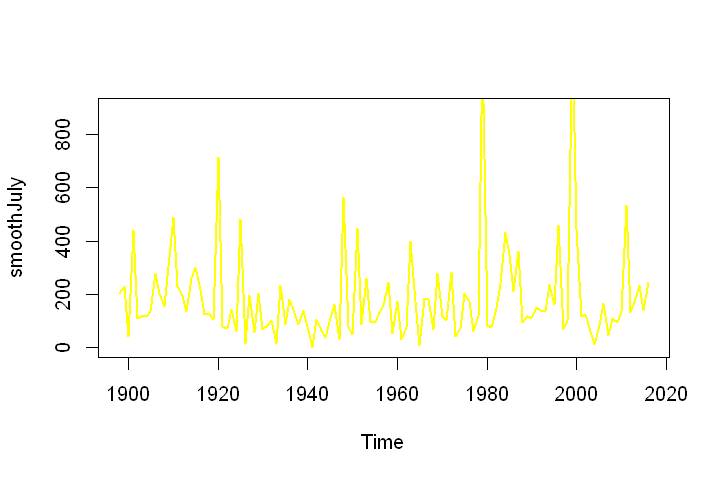

In [414]:
plot(smoothJuly, ylim=c(0,900), lwd=2, lty=1, col=7)

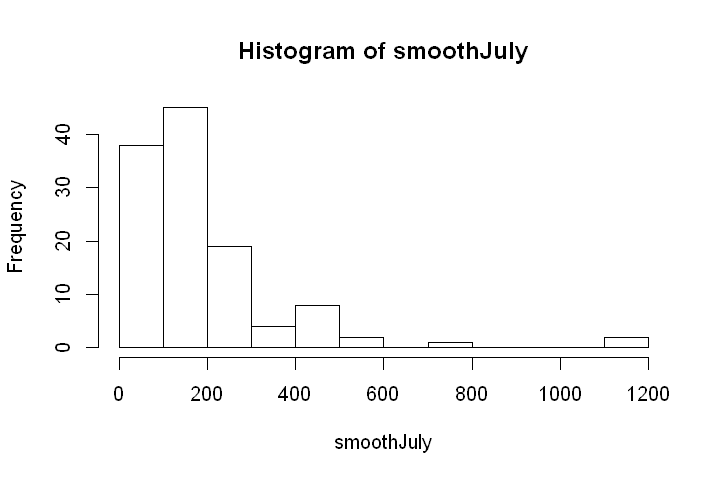

In [415]:
hist(smoothJuly,breaks=10)

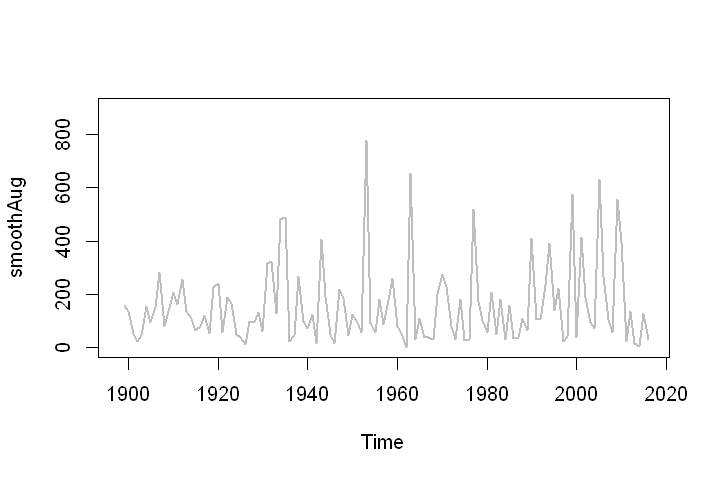

In [416]:
plot(smoothAug, ylim=c(0,900), lwd=2, lty=1, col=8)

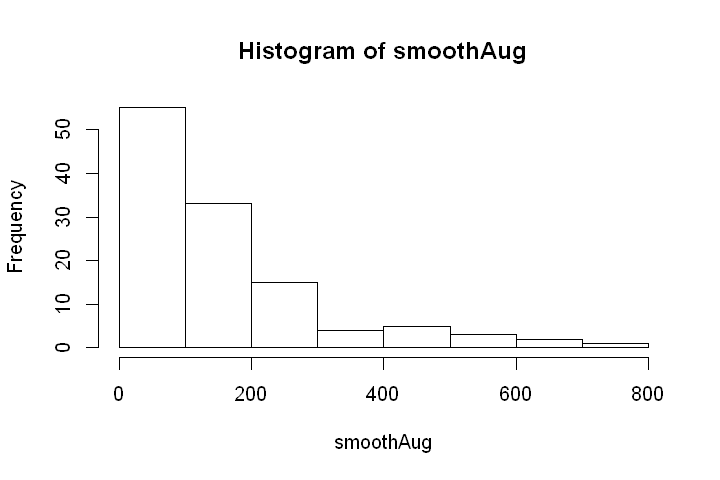

In [417]:
hist(smoothAug,breaks=10)

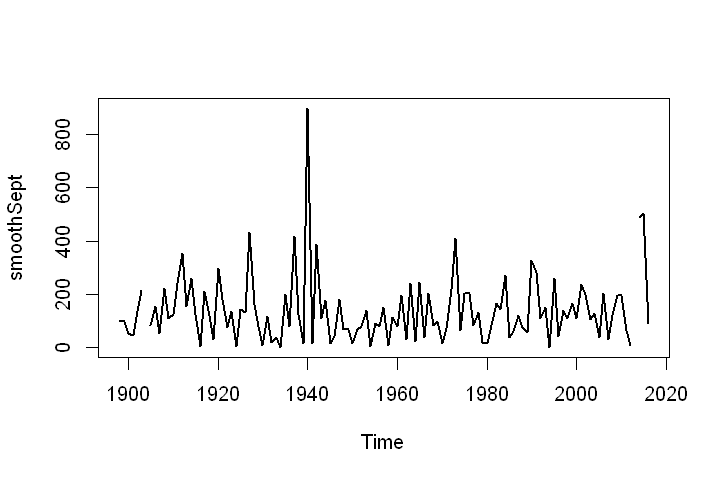

In [418]:
plot(smoothSept, ylim=c(0,900), lwd=2, lty=1, col=9)

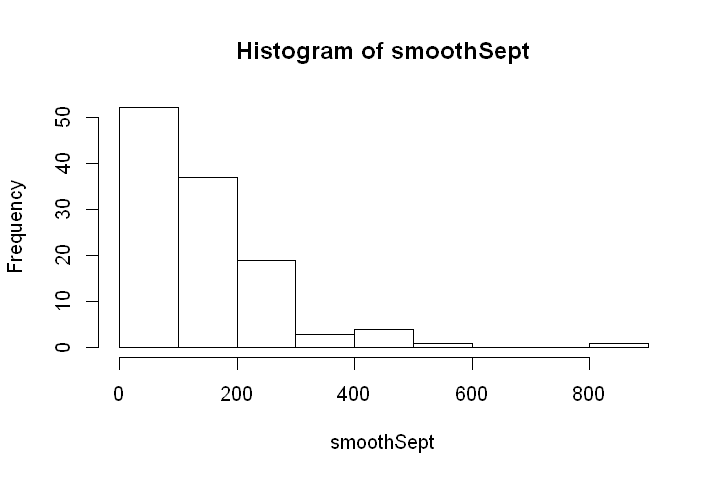

In [419]:
hist(smoothSept,breaks=10)

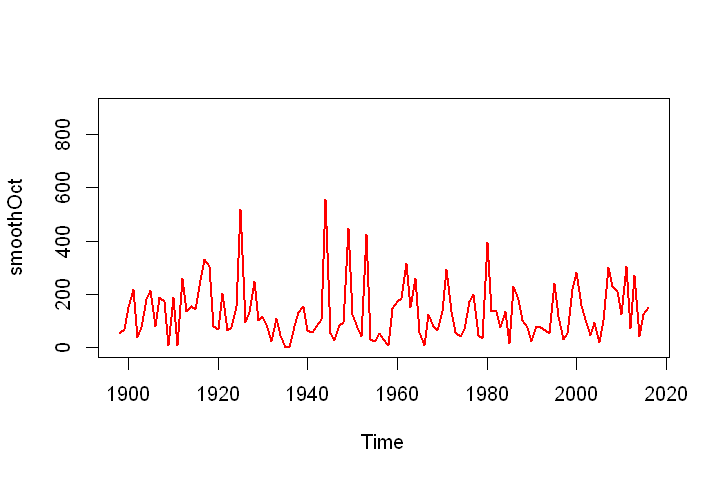

In [420]:
plot(smoothOct, ylim=c(0,900), lwd=2, lty=1, col=10)

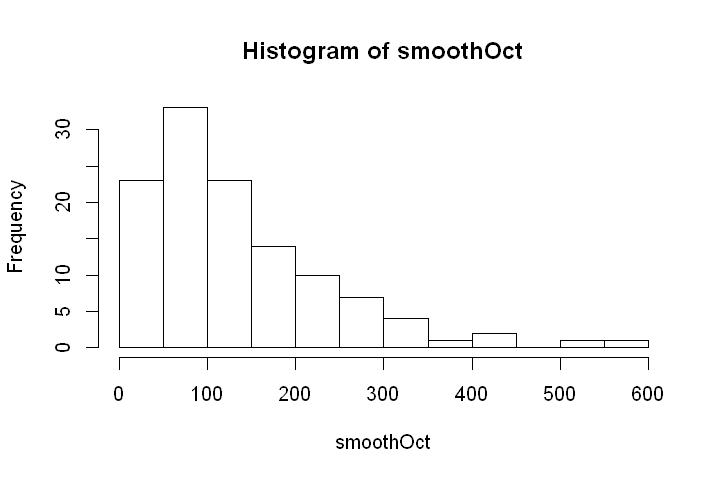

In [421]:
hist(smoothOct,breaks=10)

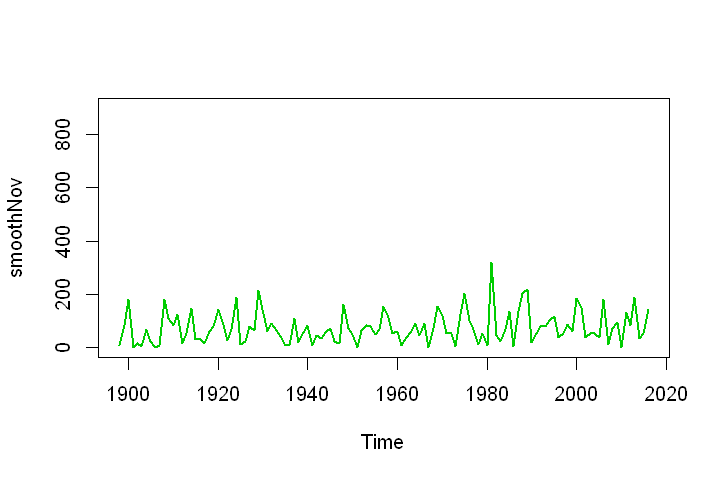

In [422]:
plot(smoothNov, ylim=c(0,900), lwd=2, lty=1, col=11)

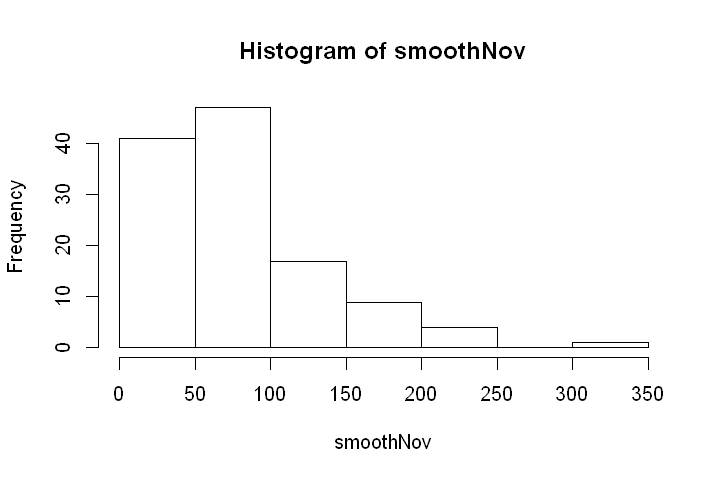

In [423]:
hist(smoothNov,breaks=10)

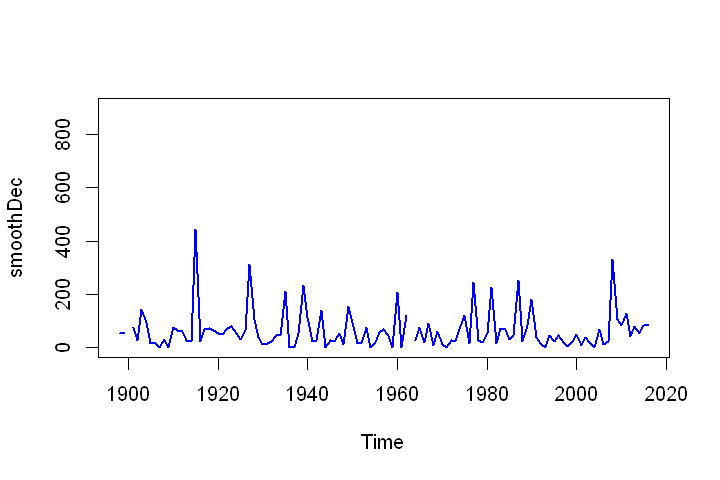

In [424]:
plot(smoothDec, ylim=c(0,900), lwd=2, lty=1, col=12)

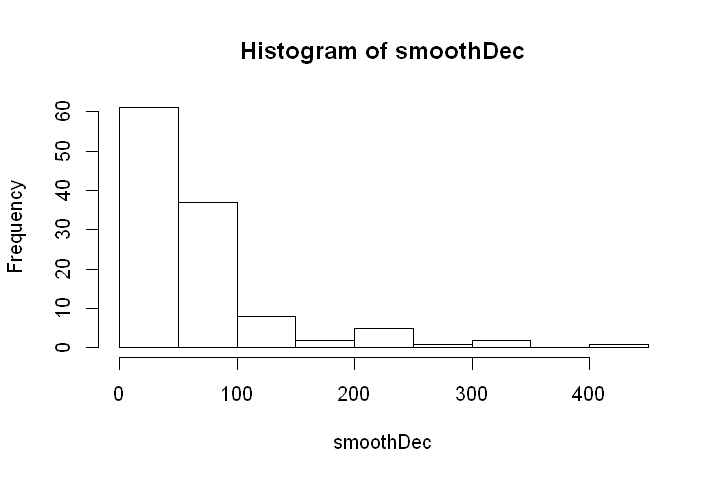

In [425]:
hist(smoothDec,breaks=10)

Flood tolerance, probabilities from selected distributions, bayesian updated (last add)

Change point detection

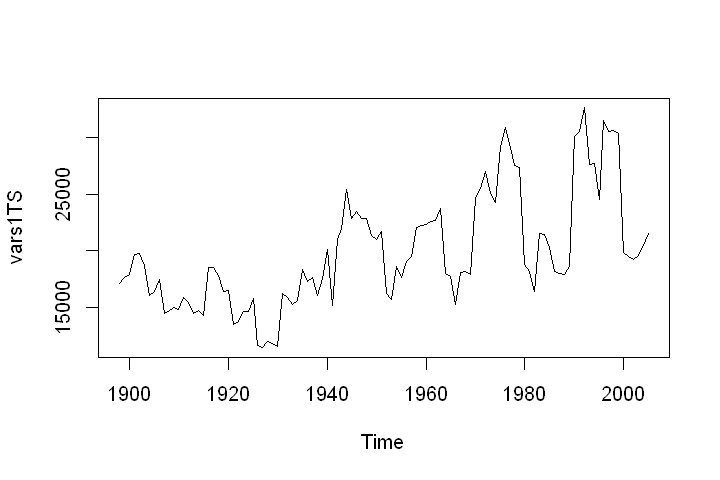

In [426]:
plot(vars1TS)

In [377]:
head(mleGamma)

alpha,theta,KS,KStest,CvM,CvMtest,AD,ADtest,invTheta,mean,var,sd
0.7702459,0.005838670,0.11823885,not rejected,0.3945848,NA,2.578290,NA,171.2719,131.9215,22594.44,150.3145
0.7592384,0.005623842,0.10957672,not rejected,0.3993983,NA,2.545615,NA,177.8144,135.0035,24005.57,154.9373
0.7329028,0.005426065,0.11023874,not rejected,0.3867091,NA,2.377635,NA,184.2956,135.0708,24892.95,157.7750
0.7228140,0.005126209,0.10648805,not rejected,0.3718661,NA,2.266249,NA,195.0759,141.0036,27506.41,165.8506
0.7894197,0.005429997,0.10174311,not rejected,0.2569872,NA,1.422317,NA,184.1622,145.3812,26773.72,163.6268
0.7953316,0.005407428,0.09718581,not rejected,0.2725329,NA,1.497542,NA,184.9308,147.0813,27199.86,164.9238


In [378]:
x = seq(.00001,2500,1)

In [379]:
1963-1897

[1] 66

In [380]:
y = dgamma(x,mleGamma$alpha[66], scale=(1/mleGamma$theta[66]))

In [381]:
options(repr.plot.width=5, repr.plot.height=5) #reduces the plot sizes

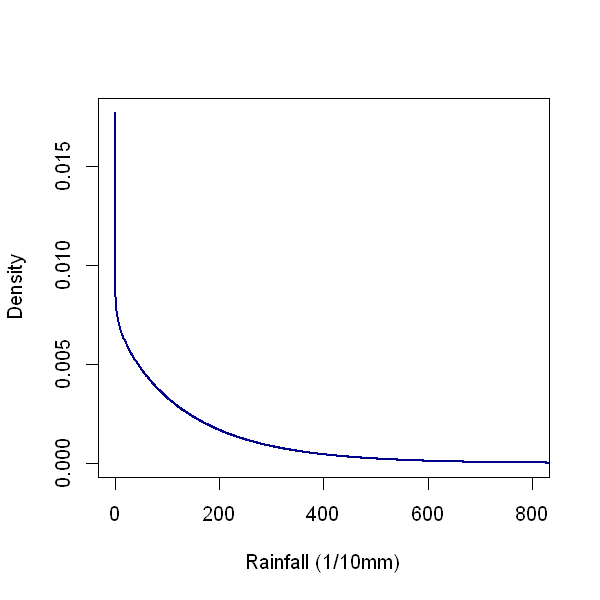

In [382]:
plot(x,y, col = "darkblue", type ="l", xlim=c(0,800), ylab="Density", xlab="Rainfall (1/10mm)", lwd=2)

In [383]:
y = dexp(1/mleExp$theta[20])

In [445]:
sum(na.omit(data2$Max.PRCP>914))

[1] 2

In [384]:
plot(x,y, col = "darkblue", type ="l", xlim=c(0,800), ylab="Density", xlab="Rainfall (1/10mm)", lwd=2)

ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' and 'y' lengths differ


jpeg(file = “C://R//SAVEHERE//myplot.jpeg”)
plot(x,y)
dev.off()